In [18]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv('data/train.csv', encoding='utf-8')
df_test = pd.read_csv('data/test.csv', encoding='utf-8', header=None, sep=',')


/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,3,4,6,7,8,9,10,11,19,20,21,26,27,37,38,39,50,51,52,53,54,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.head(100)
# df.isnull().sum()

id  label                province               district  age_source1  \
0    0      0                     NaN                    NaN          NaN   
1    1      0           Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2    2      0           Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3    3      0        Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4    4      0   Thành phố Hồ Chí Minh                 Quận 1         21.0   
..  ..    ...                     ...                    ...          ...   
95  95      0  Tỉnh Bà Rịa - Vũng Tàu       Thành phố Bà Rịa         22.0   
96  96      0                     NaN                    NaN          NaN   
97  97      0       Thành phố Đà Nẵng         Huyện Hòa Vang         32.0   
98  98      0                     NaN                    NaN          NaN   
99  99      0                     NaN                    NaN          NaN   

    age_source2               maCv  FIELD_1  FIELD_2  FIELD_3  ...  FIELD_48  \
0           NaN                NaN        1      1.0   2547.0  ...      True   
1          44.0               None        1      0.0     -1.0  ...     False   
2          30.0          Công nhân        0      1.0   3273.0  ...      True   
3           NaN                NaN        0      1.0   3991.0  ...      True   
4          21.0               None        0      1.0   1450.0  ...      True   
..          ...                ...      ...      ...      ...  ...       ...   
95         22.0               None        1      1.0    361.0  ...      True   
96          NaN                NaN        1      0.0     -1.0  ...     False   
97          NaN                NaN        0      1.0   3262.0  ...      True   
98         21.0  công nhân lắp ráp        1      1.0   1445.0  ...      True   
99         43.0            Kế toán        0      1.0   7651.0  ...      True   

    FIELD_49  FIELD_50 FIELD_51 FIELD_52 FIELD_53 FIELD_54 FIELD_55 FIELD_56  \
0       True       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       True     29.77   17.561   30.955   31.171      0.0     0.04     0.00   
2       True     29.77   56.512   30.955   31.171      0.0     0.16     0.00   
3      False       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       True     29.77   13.789   30.955   31.171      0.0     0.03     0.00   
..       ...       ...      ...      ...      ...      ...      ...      ...   
95      True     29.77   15.492   30.955   31.171      0.0     0.04     0.00   
96      True       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
97      True       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
98     False     29.77   36.084   66.741   66.737      0.0     0.12     0.15   
99      True     29.77   42.190   30.955   31.171      0.0     0.13     0.00   

   FIELD_57  
0       NaN  
1      0.00  
2      0.00  
3       NaN  
4      0.00  
..      ...  
95     0.00  
96      NaN  
97      NaN  
98     0.15  
99     0.00  

[100 rows x 64 columns]

In [10]:
df.describe()

id         label   age_source1   age_source2       FIELD_1  \
count  30000.000000  30000.000000  17189.000000  20322.000000  30000.000000   
mean   14999.500000      0.016200     33.041015     32.872011      0.775333   
std     8660.398374      0.126246      9.187672      9.096176      0.417370   
min        0.000000      0.000000      0.000000     -1.000000      0.000000   
25%     7499.750000      0.000000     26.000000     26.000000      1.000000   
50%    14999.500000      0.000000     31.000000     31.000000      1.000000   
75%    22499.250000      0.000000     39.000000     38.000000      1.000000   
max    29999.000000      1.000000     71.000000     89.000000      1.000000   

            FIELD_2       FIELD_3       FIELD_4       FIELD_5       FIELD_6  \
count  29537.000000  29537.000000  29537.000000  29537.000000  29537.000000   
mean       0.763145   1731.263466      0.573653      1.781664      0.142262   
std        0.425160   1472.537441      0.971284      2.010544      0.448462   
min        0.000000     -1.000000      0.000000      0.000000      0.000000   
25%        1.000000    343.000000      0.000000      0.000000      0.000000   
50%        1.000000   1452.000000      0.000000      1.000000      0.000000   
75%        1.000000   2913.000000      1.000000      3.000000      0.000000   
max        1.000000   8037.000000     12.000000     14.000000      4.000000   

       ...      FIELD_34      FIELD_46      FIELD_50      FIELD_51  \
count  ...  30000.000000  30000.000000  20322.000000  20322.000000   
mean   ...      0.455433      0.402733     33.863651     33.747108   
std    ...      0.498018      0.490456     11.068959     19.515369   
min    ...      0.000000      0.000000     29.770000      4.413000   
25%    ...      0.000000      0.000000     29.770000     16.799000   
50%    ...      0.000000      0.000000     29.770000     33.650000   
75%    ...      1.000000      1.000000     29.770000     50.853000   
max    ...      1.000000      1.000000     67.634000     67.633000   

           FIELD_52      FIELD_53      FIELD_54      FIELD_55      FIELD_56  \
count  20322.000000  20322.000000  20322.000000  20322.000000  20322.000000   
mean      33.827021     33.817174      0.037002      0.103469      0.008508   
std        9.442494      9.095917      0.117726      0.086140      0.032152   
min       30.955000     31.171000      0.000000      0.000000      0.000000   
25%       30.955000     31.171000      0.000000      0.040000      0.000000   
50%       30.955000     31.171000      0.000000      0.110000      0.000000   
75%       30.955000     31.171000      0.000000      0.150000      0.000000   
max       67.634000     67.634000      1.000000      1.000000      0.920000   

           FIELD_57  
count  20322.000000  
mean       0.008222  
std        0.032129  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        0.920000  

[8 rows x 27 columns]

In [45]:
df_description = pd.read_csv("data/columns_description.csv")
df_test.head(5)

0                 1             2            3            4   \
0     id          province      district  age_source1  age_source2   
1  30000               NaN           NaN          NaN          NaN   
2  30001               NaN           NaN          NaN          NaN   
3  30002  Thành phố Hà Nội  Huyện Mỹ Đức           32           32   
4  30003               NaN           NaN          NaN           25   

                                 5        6        7        8        9   ...  \
0                              maCv  FIELD_1  FIELD_2  FIELD_3  FIELD_4  ...   
1                               NaN        1        1      719        0  ...   
2                               NaN        1        1     1442        0  ...   
3  Trưởng dây chuyền phòng sản xuất        0        1     4000        2  ...   
4                              None        0        1     1073        0  ...   

         53        54        55        56        57        58        59  \
0  FIELD_48  FIELD_49  FIELD_50  FIELD_51  FIELD_52  FIELD_53  FIELD_54   
1      TRUE      TRUE       NaN       NaN       NaN       NaN       NaN   
2      TRUE      TRUE       NaN       NaN       NaN       NaN       NaN   
3      TRUE     FALSE     29.77    66.428    30.955    31.171         0   
4      TRUE      TRUE     29.77    21.478    30.955    31.171         0   

         60        61        62  
0  FIELD_55  FIELD_56  FIELD_57  
1       NaN       NaN       NaN  
2       NaN       NaN       NaN  
3      0.31         0         0  
4      0.05         0         0  

[5 rows x 63 columns]

In [6]:
df_description.head()

ID       Table       Fields  \
0   1  train|test           id   
1   2       train        label   
2   3  train|test     province   
3   4  train|test     district   
4   5  train|test  age_source1   

                                         Description Field type  
0                                       ID of client        INT  
1  Target variable (1 - client with payment diffi...        INT  
2                                 Province of client     String  
3                                 District of client     String  
4                        Age of client from source 1        INT

In [9]:
df_description['Description'].values


array(['ID of client',
       'Target variable (1 - client with payment difficulties, 0 - all other cases)',
       'Province of client', 'District of client',
       'Age of client from source 1', 'Age of client from source 2',
       'Job description of client', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=object)

In [7]:
submit_df = pd.read_csv("data/sample_submission.csv")

In [9]:
submit_df.describe()

id    label
count  20000.000000  20000.0
mean   39999.500000      0.5
std     5773.647028      0.0
min    30000.000000      0.5
25%    34999.750000      0.5
50%    39999.500000      0.5
75%    44999.250000      0.5
max    49999.000000      0.5

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 64 columns):
id             30000 non-null int64
label          30000 non-null int64
province       17182 non-null object
district       17151 non-null object
age_source1    17189 non-null float64
age_source2    20322 non-null float64
maCv           20321 non-null object
FIELD_1        30000 non-null int64
FIELD_2        29537 non-null float64
FIELD_3        29537 non-null float64
FIELD_4        29537 non-null float64
FIELD_5        29537 non-null float64
FIELD_6        29537 non-null float64
FIELD_7        29537 non-null object
FIELD_8        20322 non-null object
FIELD_9        30000 non-null object
FIELD_10       20322 non-null object
FIELD_11       20322 non-null object
FIELD_12       20322 non-null object
FIELD_13       20300 non-null object
FIELD_14       30000 non-null int64
FIELD_15       30000 non-null int64
FIELD_16       20322 non-null float64
FIELD_17       20322 non-null object


In [17]:
df.columns.unique()

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 'FIELD_5',
       'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11',
       'FIELD_12', 'FIELD_13', 'FIELD_14', 'FIELD_15', 'FIELD_16', 'FIELD_17',
       'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21', 'FIELD_22', 'FIELD_23',
       'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29',
       'FIELD_30', 'FIELD_31', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_35',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41',
       'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_46', 'FIELD_47',
       'FIELD_48', 'FIELD_49', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53',
       'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57'],
      dtype='object')

In [19]:
columns = np.asarray(df.columns)

col:  id
[    0     1     2 ... 29997 29998 29999]
col:  label
[0 1]
col:  province
[nan 'Tỉnh Đồng Nai' 'Tỉnh Tuyên Quang' 'Thành phố Hồ Chí Minh'
 'Tỉnh Bắc Giang' 'Tỉnh Thanh Hóa' 'Tỉnh Thừa Thiên Huế' 'Tỉnh Cà Mau'
 'Tỉnh Kiên Giang' 'Tỉnh Long An' 'Tỉnh Tây Ninh' 'Thành phố Hà Nội'
 'Tỉnh Bình Dương' 'Tỉnh Hòa Bình' 'Tỉnh Bến Tre' 'Tỉnh Tiền Giang'
 'Tỉnh Hà Tĩnh' 'Tỉnh Hoà Bình' 'Tỉnh Hậu Giang' 'Tỉnh Quảng Nam'
 'Tỉnh Khánh Hòa' 'Tỉnh Phú Yên' 'Tỉnh Phú Thọ' 'Tỉnh Vĩnh Phúc'
 'Tỉnh Hưng Yên' 'Tỉnh Bình Phước' 'Thành phố Đà Nẵng' 'Tỉnh Đồng Tháp'
 'Tỉnh Bình Định' 'Tỉnh Bà Rịa - Vũng Tàu' 'Tỉnh Quảng Ninh'
 'Tỉnh Trà Vinh' 'Tỉnh Nghệ An' 'Tỉnh Bắc Kạn' 'Tỉnh Bình Thuận'
 'Tỉnh An Giang' 'Tỉnh Thái Bình' 'Tỉnh Bạc Liêu' 'Tỉnh Ninh Bình'
 'Thành phố Hải Phòng' 'Tỉnh Quảng Ngãi' 'Tỉnh Lâm Đồng' 'Tỉnh Gia Lai'
 'Tỉnh Nam Định' 'Tỉnh Lạng Sơn' 'Tỉnh Sơn La' 'Tỉnh Vĩnh Long'
 'Tỉnh Thái Nguyên' 'Thành phố Cần Thơ' 'Tỉnh Quảng Bình' 'Tỉnh Hà Nam'
 'Tỉnh Yên Bái' 'Tỉnh Hải Dương' 'Tỉnh Đ

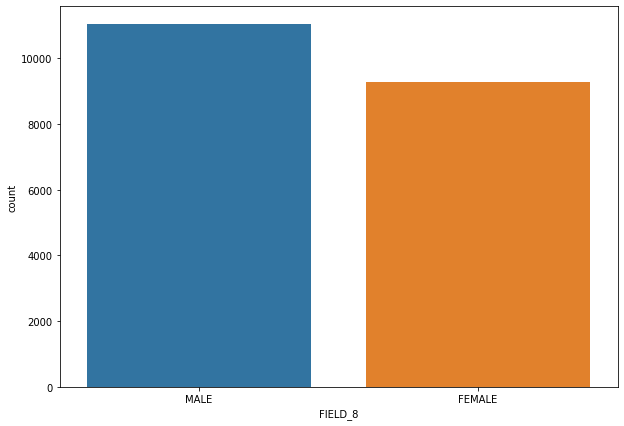

In [25]:
#check Field_8 là giới tính xem ai có xu hướng dùng nhiều credit card
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='FIELD_8',data=df)

In [26]:
print("Surprisingly, Males are the highest borrowers with counts:\n{}".format(df.FIELD_8.value_counts()))

Surprisingly, females are the highest borrowers with counts:
MALE      11031
FEMALE     9291
Name: FIELD_8, dtype: int64


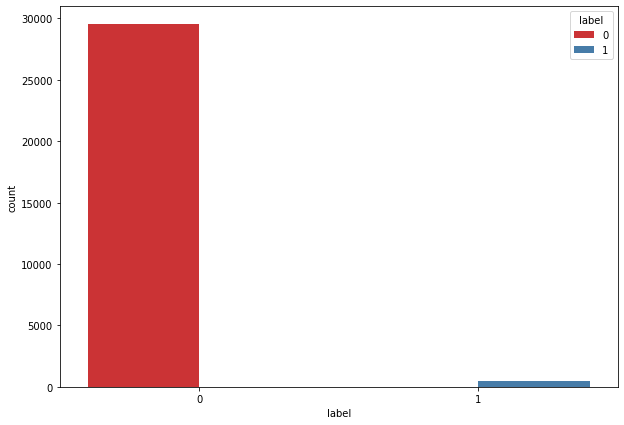

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='label',data=df, hue='label',palette="Set1")

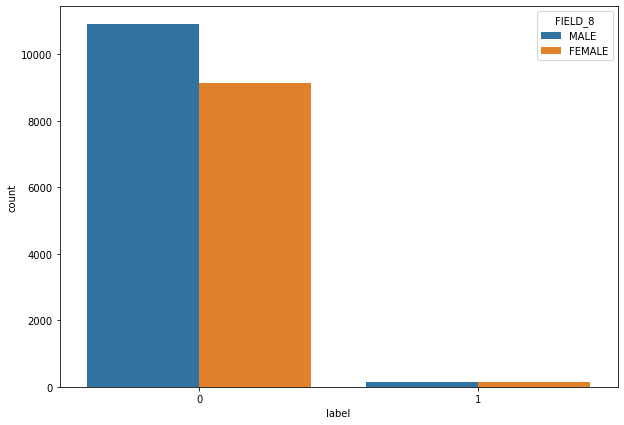

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='label',hue='FIELD_8',data=df)

In [30]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [31]:
missing_columns(df)


Missing Count  Missing Count Ratio  Missing Count %
district             12849             0.428300             42.8
province             12818             0.427267             42.7
age_source1          12811             0.427033             42.7
FIELD_13              9700             0.323333             32.3
maCv                  9679             0.322633             32.3
FIELD_57              9678             0.322600             32.3
FIELD_20              9678             0.322600             32.3
FIELD_28              9678             0.322600             32.3
FIELD_27              9678             0.322600             32.3
FIELD_26              9678             0.322600             32.3
FIELD_56              9678             0.322600             32.3
FIELD_24              9678             0.322600             32.3
FIELD_23              9678             0.322600             32.3
FIELD_22              9678             0.322600             32.3
FIELD_21              9678             0.322600             32.3
FIELD_17              9678             0.322600             32.3
FIELD_19              9678             0.322600             32.3
FIELD_18              9678             0.322600             32.3
FIELD_30              9678             0.322600             32.3
FIELD_16              9678             0.322600             32.3
FIELD_12              9678             0.322600             32.3
FIELD_11              9678             0.322600             32.3
FIELD_10              9678             0.322600             32.3
FIELD_8               9678             0.322600             32.3
age_source2           9678             0.322600             32.3
FIELD_29              9678             0.322600             32.3
FIELD_25              9678             0.322600             32.3
FIELD_31              9678             0.322600             32.3
FIELD_41              9678             0.322600             32.3
FIELD_50              9678             0.322600             32.3
FIELD_51              9678             0.322600             32.3
FIELD_52              9678             0.322600             32.3
FIELD_53              9678             0.322600             32.3
FIELD_54              9678             0.322600             32.3
FIELD_45              9678             0.322600             32.3
FIELD_43              9678             0.322600             32.3
FIELD_42              9678             0.322600             32.3
FIELD_44              9678             0.322600             32.3
FIELD_40              9678             0.322600             32.3
FIELD_39              9678             0.322600             32.3
FIELD_38              9678             0.322600             32.3
FIELD_37              9678             0.322600             32.3
FIELD_36              9678             0.322600             32.3
FIELD_35              9678             0.322600             32.3
FIELD_55              9678             0.322600             32.3
FIELD_4                463             0.015433              1.5
FIELD_2                463             0.015433              1.5
FIELD_3                463             0.015433              1.5
FIELD_7                463             0.015433              1.5
FIELD_6                463             0.015433              1.5
FIELD_5                463             0.015433              1.5

In [32]:
print("Train dataset: \n{}".format(df.dtypes.value_counts()))
print()

Train dataset: 
object     34
float64    18
int64       9
bool        3
dtype: int64



In [33]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique)

province      65
district     718
maCv        3066
FIELD_7     7088
FIELD_8        2
FIELD_9       36
FIELD_10       2
FIELD_11      45
FIELD_12       5
FIELD_13     227
FIELD_17       8
FIELD_18       2
FIELD_19       2
FIELD_20       2
FIELD_23       1
FIELD_24       4
FIELD_25       2
FIELD_26       2
FIELD_27       2
FIELD_28       2
FIELD_29       3
FIELD_30       3
FIELD_31       2
FIELD_35       5
FIELD_36       3
FIELD_37       5
FIELD_38       2
FIELD_39      45
FIELD_40       9
FIELD_41       5
FIELD_42       3
FIELD_43       7
FIELD_44       3
FIELD_45       5
dtype: int64

# Handling Categorical variables - Label Encoding and One Hot Encoding

In [38]:
# Create a label encode object having less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in df.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(df[col]) <= 2:
        df[col] = le.fit_transform(df[col].astype(str))
        df_test[col] = le.fit_transform(df_test[col].astype(str))
        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))

KeyError: 'FIELD_8'

In [107]:
cat_features = ['province', 'district',
                'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_1', 'FIELD_2', 'FIELD_5',
                'FIELD_10', 'FIELD_13', 'FIELD_17', 
                'FIELD_24', 'FIELD_35', 'FIELD_39', 
                'FIELD_41', 'FIELD_42', 'FIELD_43', 
                'FIELD_44', 'FIELD_16', 'FIELD_21', 'FIELD_32','FIELD_33','FIELD_34', 'FIELD_40', 'FIELD_45','FIELD_46' ]
bool_features = ['FIELD_18', 'FIELD_19', 
                 'FIELD_20', 'FIELD_23', 'FIELD_25', 
                 'FIELD_26', 'FIELD_27', 'FIELD_28', 
                 'FIELD_29', 'FIELD_30', 'FIELD_31', 
                 'FIELD_36', 'FIELD_37', 'FIELD_38', 
                 'FIELD_47', 'FIELD_48', 'FIELD_49']

['id', 'label', 'age_source1', 'age_source2', 'FIELD_3', 'FIELD_4', 'FIELD_6', 'FIELD_11', 'FIELD_12', 'FIELD_14', 'FIELD_15', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57']


col:  id
[    0     1     2 ... 29997 29998 29999]
col:  label
[0 1]
col:  province
[nan 'Tỉnh Đồng Nai' 'Tỉnh Tuyên Quang' 'Thành phố Hồ Chí Minh'
 'Tỉnh Bắc Giang' 'Tỉnh Thanh Hóa' 'Tỉnh Thừa Thiên Huế' 'Tỉnh Cà Mau'
 'Tỉnh Kiên Giang' 'Tỉnh Long An' 'Tỉnh Tây Ninh' 'Thành phố Hà Nội'
 'Tỉnh Bình Dương' 'Tỉnh Hòa Bình' 'Tỉnh Bến Tre' 'Tỉnh Tiền Giang'
 'Tỉnh Hà Tĩnh' 'Tỉnh Hoà Bình' 'Tỉnh Hậu Giang' 'Tỉnh Quảng Nam'
 'Tỉnh Khánh Hòa' 'Tỉnh Phú Yên' 'Tỉnh Phú Thọ' 'Tỉnh Vĩnh Phúc'
 'Tỉnh Hưng Yên' 'Tỉnh Bình Phước' 'Thành phố Đà Nẵng' 'Tỉnh Đồng Tháp'
 'Tỉnh Bình Định' 'Tỉnh Bà Rịa - Vũng Tàu' 'Tỉnh Quảng Ninh'
 'Tỉnh Trà Vinh' 'Tỉnh Nghệ An' 'Tỉnh Bắc Kạn' 'Tỉnh Bình Thuận'
 'Tỉnh An Giang' 'Tỉnh Thái Bình' 'Tỉnh Bạc Liêu' 'Tỉnh Ninh Bình'
 'Thành phố Hải Phòng' 'Tỉnh Quảng Ngãi' 'Tỉnh Lâm Đồng' 'Tỉnh Gia Lai'
 'Tỉnh Nam Định' 'Tỉnh Lạng Sơn' 'Tỉnh Sơn La' 'Tỉnh Vĩnh Long'
 'Tỉnh Thái Nguyên' 'Thành phố Cần Thơ' 'Tỉnh Quảng Bình' 'Tỉnh Hà Nam'
 'Tỉnh Yên Bái' 'Tỉnh Hải Dương' 'Tỉnh Đ

In [46]:
df_description.head(10)

ID       Table       Fields  \
0   1  train|test           id   
1   2       train        label   
2   3  train|test     province   
3   4  train|test     district   
4   5  train|test  age_source1   
5   6  train|test  age_source2   
6   7  train|test         maCv   
7   8  train|test      FIELD_1   
8   9  train|test      FIELD_2   
9  10  train|test      FIELD_3   

                                         Description Field type  
0                                       ID of client        INT  
1  Target variable (1 - client with payment diffi...        INT  
2                                 Province of client     String  
3                                 District of client     String  
4                        Age of client from source 1        INT  
5                        Age of client from source 2        INT  
6                          Job description of client     String  
7                                                NaN        NaN  
8                                                NaN        NaN  
9                                                NaN        NaN

In [47]:
# examine fraction of missing value in each attribute
def missing_df(df):
        """
        return a data frame containing the statistics of missing value
        """
        
        total = df.isnull().sum().sort_values(ascending=False)
        fraction = 100 * total / df.shape[0]
        
        # keep to two decimal places
        fraction = fraction.apply(lambda x: round(x,2))
        
        df_missing = pd.concat([total,fraction], axis=1, keys=['Total','Fraction'])
        df_missing.index.name = 'Attributes'
        
        return df_missing
    
    
def cut_missing_fea(df, mis_threshold=60):
    """
    cut off features with ratio of missing values bigger than 60%
    """
    missing = missing_df(df)
    keep_fea = missing[missing['Fraction']<mis_threshold].index

    return df[keep_fea]


    
def prepare_data(df, group_var, prefix):
    
    # cut off featues with too much missing values
    df = cut_missing_fea(df)
    
    # if only one or two categories, factorize()
    for col in df:
        if col in cat_features and len(list(df[col].unique())) <= 2:
            df.loc[:,col], _ = pd.factorize(df[col])
    
    # one hot encoding if more than two categories, including Null
    df = pd.get_dummies(df,dummy_na=True)
    
    # compute sum, mean, std for each column
    d1 = df.drop([group_var],axis=1).groupby('id').agg(['sum','mean','std'])
    d1.columns = ['_'.join(col).strip('_ ') for col in d1.columns.values]
    d1.add_prefix(prefix+'_')
    
    # count group_var for each SK_ID_CURR
    d2 = df[['id',group_var]].groupby('id').count()
    
    # merge 
    df = pd.merge(d1,d2,left_index=True,right_index=True,how='left')
    
    # add prefix
    df = df.add_prefix(prefix+'_')
    
    return df.reset_index()

In [48]:
corr_Y = df.corr(method='pearson')["label"].sort_values()
print(corr_Y.head(10),corr_Y.tail(10),sep='\n\n')

FIELD_46   -0.025695
FIELD_22   -0.025692
FIELD_6    -0.023385
FIELD_47   -0.019216
FIELD_3    -0.018621
FIELD_5    -0.017997
FIELD_48   -0.017964
FIELD_54   -0.014951
FIELD_55   -0.014479
FIELD_51   -0.011158
Name: label, dtype: float64

FIELD_1     0.018465
FIELD_34    0.018906
FIELD_32    0.025701
FIELD_57    0.027726
FIELD_56    0.027822
FIELD_53    0.028240
FIELD_52    0.028886
FIELD_14    0.032199
FIELD_15    0.032945
label       1.000000
Name: label, dtype: float64


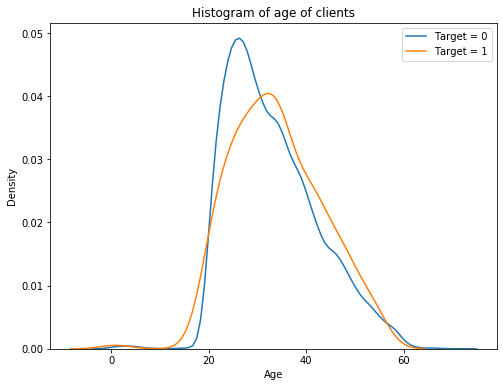

In [53]:
plt.figure(figsize = (8,6))
sns.kdeplot(df[df['label']==0]['age_source1']  , label = 'Target = 0')
sns.kdeplot(df[df['label']==1]['age_source1'], label = 'Target = 1')
plt.title('Histogram of age of clients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

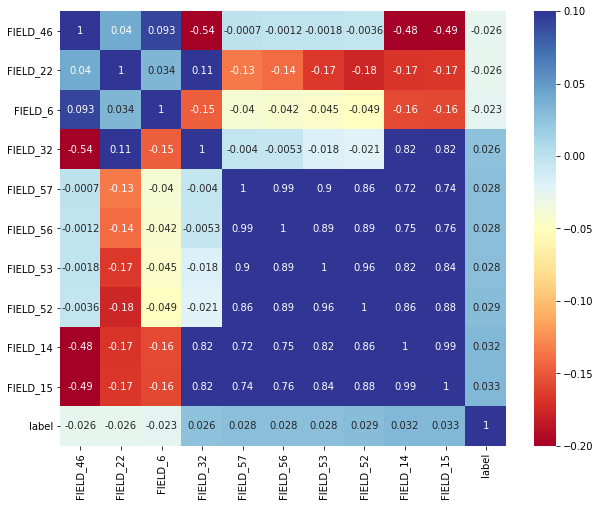

In [59]:
# select only attributes with |corr| > 0.05
indices = corr_Y[abs(corr_Y) > 0.02].index
fea_corr = df[indices].corr()

plt.figure(figsize=(10,8))
sns.heatmap(fea_corr, cmap="RdYlBu", annot=True, vmin=-0.2, vmax=0.1)
plt.show()

In [61]:
for col in columns:
    print(df[col].describe())

count    30000.000000
mean     14999.500000
std       8660.398374
min          0.000000
25%       7499.750000
50%      14999.500000
75%      22499.250000
max      29999.000000
Name: id, dtype: float64
count    30000.000000
mean         0.016200
std          0.126246
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64
count                     17182
unique                       65
top       Thành phố Hồ Chí Minh
freq                       2389
Name: province, dtype: object
count                17151
unique                 718
top       Huyện Châu Thành
freq                   405
Name: district, dtype: object
count    17189.000000
mean        33.041015
std          9.187672
min          0.000000
25%         26.000000
50%         31.000000
75%         39.000000
max         71.000000
Name: age_source1, dtype: float64
count    20322.000000
mean        32.872011
std          9.096176
min         -1.000000
2

col:  id
[    0     1     2 ... 29997 29998 29999]
col:  label
[0 1]
col:  province
[nan 'Tỉnh Đồng Nai' 'Tỉnh Tuyên Quang' 'Thành phố Hồ Chí Minh'
 'Tỉnh Bắc Giang' 'Tỉnh Thanh Hóa' 'Tỉnh Thừa Thiên Huế' 'Tỉnh Cà Mau'
 'Tỉnh Kiên Giang' 'Tỉnh Long An' 'Tỉnh Tây Ninh' 'Thành phố Hà Nội'
 'Tỉnh Bình Dương' 'Tỉnh Hòa Bình' 'Tỉnh Bến Tre' 'Tỉnh Tiền Giang'
 'Tỉnh Hà Tĩnh' 'Tỉnh Hoà Bình' 'Tỉnh Hậu Giang' 'Tỉnh Quảng Nam'
 'Tỉnh Khánh Hòa' 'Tỉnh Phú Yên' 'Tỉnh Phú Thọ' 'Tỉnh Vĩnh Phúc'
 'Tỉnh Hưng Yên' 'Tỉnh Bình Phước' 'Thành phố Đà Nẵng' 'Tỉnh Đồng Tháp'
 'Tỉnh Bình Định' 'Tỉnh Bà Rịa - Vũng Tàu' 'Tỉnh Quảng Ninh'
 'Tỉnh Trà Vinh' 'Tỉnh Nghệ An' 'Tỉnh Bắc Kạn' 'Tỉnh Bình Thuận'
 'Tỉnh An Giang' 'Tỉnh Thái Bình' 'Tỉnh Bạc Liêu' 'Tỉnh Ninh Bình'
 'Thành phố Hải Phòng' 'Tỉnh Quảng Ngãi' 'Tỉnh Lâm Đồng' 'Tỉnh Gia Lai'
 'Tỉnh Nam Định' 'Tỉnh Lạng Sơn' 'Tỉnh Sơn La' 'Tỉnh Vĩnh Long'
 'Tỉnh Thái Nguyên' 'Thành phố Cần Thơ' 'Tỉnh Quảng Bình' 'Tỉnh Hà Nam'
 'Tỉnh Yên Bái' 'Tỉnh Hải Dương' 'Tỉnh Đ

In [200]:
from sklearn.preprocessing import LabelEncoder
cleanup_nums = {
    "FIELD_17": {'None': np.nan},
                "FIELD_24": {'None': np.nan, 'K3':3, 'K1':1, 'K2':2},
                "FIELD_29": {'None': np.nan, 'FALSE': False, 'TRUE': True},
                "FIELD_30": {'None': np.nan, 'FALSE': False, 'TRUE': True},
                "FIELD_31": {'None': np.nan, 'FALSE': False},
                "FIELD_35": {'Zero': 0, 'One':1, 'Two':2, 'Three': 3, 'Four': 4},
                "FIELD_36": {'None': np.nan},
                "FIELD_37": {'TRUE': True, 'FALSE': False, 'None': np.nan},
                "FIELD_41": {'I': 1, 'II': 2, 'III': 3, 'IV':4, 'V':5},
                "FIELD_43": {'0': 0, 'A':1, 'B':2, 'C':3, 'D':4,'5':5, 'None': np.nan },
                "FIELD_44": {'None': np.nan, 'One':1, 'Two':2},
                "FIELD_45": {'1': 1.0, '2': 2.0, 'None': np.nan},
                "FIELD_9": {'na': np.nan},
                "maCv": {'None': np.nan},
                "FIELD_11": {'None': np.nan},
                "FIELD_12": {'None': np.nan, '0':0, '1':2, 'HT':-1, 'TN':-1, ''},
                  "FIELD_39": {'None': np.nan},
                  "FIELD_40": {'None': np.nan, '1': 1, '2': 2, '02 05 08 11': -1,'08 02': -1, '05 08 11 02': -1, '3':3, '6':6, '4':4 },
                  "FIELD_42": {'Zezo': 0, 'One': 1, 'Two': 2, 'None': np.nan },
                  "FIELD_36": {'FALSE': False, 'TRUE': True}
               }

In [83]:
df.replace(cleanup_nums, inplace=True)
df.head()

id  label               province               district  age_source1  \
0   0      0                    NaN                    NaN          NaN   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1         21.0   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3  ...  FIELD_48  FIELD_49  \
0          NaN        NaN        1      1.0   2547.0  ...      True      True   
1         44.0        NaN        1      0.0     -1.0  ...     False      True   
2         30.0  Công nhân        0      1.0   3273.0  ...      True      True   
3          NaN        NaN        0      1.0   3991.0  ...      True     False   
4         21.0        NaN        0      1.0   1450.0  ...      True      True   

   FIELD_50 FIELD_51 FIELD_52 FIELD_53 FIELD_54 FIELD_55  FIELD_56 FIELD_57  
0       NaN      NaN      NaN      NaN      NaN      NaN       NaN      NaN  
1     29.77   17.561   30.955   31.171      0.0     0.04       0.0      0.0  
2     29.77   56.512   30.955   31.171      0.0     0.16       0.0      0.0  
3       NaN      NaN      NaN      NaN      NaN      NaN       NaN      NaN  
4     29.77   13.789   30.955   31.171      0.0     0.03       0.0      0.0  

[5 rows x 64 columns]

In [84]:
for col in columns:
    print("col: ", col)
    print(df[col].unique())

col:  id
[    0     1     2 ... 29997 29998 29999]
col:  label
[0 1]
col:  province
[nan 'Tỉnh Đồng Nai' 'Tỉnh Tuyên Quang' 'Thành phố Hồ Chí Minh'
 'Tỉnh Bắc Giang' 'Tỉnh Thanh Hóa' 'Tỉnh Thừa Thiên Huế' 'Tỉnh Cà Mau'
 'Tỉnh Kiên Giang' 'Tỉnh Long An' 'Tỉnh Tây Ninh' 'Thành phố Hà Nội'
 'Tỉnh Bình Dương' 'Tỉnh Hòa Bình' 'Tỉnh Bến Tre' 'Tỉnh Tiền Giang'
 'Tỉnh Hà Tĩnh' 'Tỉnh Hoà Bình' 'Tỉnh Hậu Giang' 'Tỉnh Quảng Nam'
 'Tỉnh Khánh Hòa' 'Tỉnh Phú Yên' 'Tỉnh Phú Thọ' 'Tỉnh Vĩnh Phúc'
 'Tỉnh Hưng Yên' 'Tỉnh Bình Phước' 'Thành phố Đà Nẵng' 'Tỉnh Đồng Tháp'
 'Tỉnh Bình Định' 'Tỉnh Bà Rịa - Vũng Tàu' 'Tỉnh Quảng Ninh'
 'Tỉnh Trà Vinh' 'Tỉnh Nghệ An' 'Tỉnh Bắc Kạn' 'Tỉnh Bình Thuận'
 'Tỉnh An Giang' 'Tỉnh Thái Bình' 'Tỉnh Bạc Liêu' 'Tỉnh Ninh Bình'
 'Thành phố Hải Phòng' 'Tỉnh Quảng Ngãi' 'Tỉnh Lâm Đồng' 'Tỉnh Gia Lai'
 'Tỉnh Nam Định' 'Tỉnh Lạng Sơn' 'Tỉnh Sơn La' 'Tỉnh Vĩnh Long'
 'Tỉnh Thái Nguyên' 'Thành phố Cần Thơ' 'Tỉnh Quảng Bình' 'Tỉnh Hà Nam'
 'Tỉnh Yên Bái' 'Tỉnh Hải Dương' 'Tỉnh Đ

In [85]:
missing_columns(df)

Missing Count  Missing Count Ratio  Missing Count %
FIELD_24             29501             0.983367             98.3
FIELD_43             28804             0.960133             96.0
FIELD_17             26309             0.876967             87.7
FIELD_40             24899             0.829967             83.0
maCv                 22882             0.762733             76.3
FIELD_39             18675             0.622500             62.2
FIELD_31             13917             0.463900             46.4
FIELD_30             13803             0.460100             46.0
FIELD_29             13282             0.442733             44.3
FIELD_12             13277             0.442567             44.3
district             12849             0.428300             42.8
province             12818             0.427267             42.7
age_source1          12811             0.427033             42.7
FIELD_44              9713             0.323767             32.4
FIELD_11              9712             0.323733             32.4
FIELD_13              9700             0.323333             32.3
FIELD_45              9685             0.322833             32.3
FIELD_36              9683             0.322767             32.3
FIELD_37              9681             0.322700             32.3
FIELD_42              9680             0.322667             32.3
FIELD_19              9678             0.322600             32.3
FIELD_21              9678             0.322600             32.3
FIELD_22              9678             0.322600             32.3
FIELD_20              9678             0.322600             32.3
FIELD_57              9678             0.322600             32.3
FIELD_18              9678             0.322600             32.3
FIELD_16              9678             0.322600             32.3
FIELD_10              9678             0.322600             32.3
FIELD_9               9678             0.322600             32.3
FIELD_8               9678             0.322600             32.3
age_source2           9678             0.322600             32.3
FIELD_23              9678             0.322600             32.3
FIELD_25              9678             0.322600             32.3
FIELD_56              9678             0.322600             32.3
FIELD_38              9678             0.322600             32.3
FIELD_50              9678             0.322600             32.3
FIELD_26              9678             0.322600             32.3
FIELD_51              9678             0.322600             32.3
FIELD_41              9678             0.322600             32.3
FIELD_53              9678             0.322600             32.3
FIELD_52              9678             0.322600             32.3
FIELD_35              9678             0.322600             32.3
FIELD_54              9678             0.322600             32.3
FIELD_55              9678             0.322600             32.3
FIELD_28              9678             0.322600             32.3
FIELD_27              9678             0.322600             32.3
FIELD_3                463             0.015433              1.5
FIELD_2                463             0.015433              1.5
FIELD_7                463             0.015433              1.5
FIELD_6                463             0.015433              1.5
FIELD_5                463             0.015433              1.5
FIELD_4                463             0.015433              1.5

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 64 columns):
id             30000 non-null int64
label          30000 non-null int64
province       17182 non-null object
district       17151 non-null object
age_source1    17189 non-null float64
age_source2    20322 non-null float64
maCv           7118 non-null object
FIELD_1        30000 non-null int64
FIELD_2        29537 non-null float64
FIELD_3        29537 non-null float64
FIELD_4        29537 non-null float64
FIELD_5        29537 non-null float64
FIELD_6        29537 non-null float64
FIELD_7        29537 non-null object
FIELD_8        20322 non-null object
FIELD_9        20322 non-null object
FIELD_10       20322 non-null object
FIELD_11       20288 non-null object
FIELD_12       16723 non-null float64
FIELD_13       20300 non-null object
FIELD_14       30000 non-null int64
FIELD_15       30000 non-null int64
FIELD_16       20322 non-null float64
FIELD_17       3691 non-null object
F

In [89]:
for col in columns:
    print("col: ", col)
    print(df[col].unique())

col:  id
[    0     1     2 ... 29997 29998 29999]
col:  label
[0 1]
col:  province
[nan 'Tỉnh Đồng Nai' 'Tỉnh Tuyên Quang' 'Thành phố Hồ Chí Minh'
 'Tỉnh Bắc Giang' 'Tỉnh Thanh Hóa' 'Tỉnh Thừa Thiên Huế' 'Tỉnh Cà Mau'
 'Tỉnh Kiên Giang' 'Tỉnh Long An' 'Tỉnh Tây Ninh' 'Thành phố Hà Nội'
 'Tỉnh Bình Dương' 'Tỉnh Hòa Bình' 'Tỉnh Bến Tre' 'Tỉnh Tiền Giang'
 'Tỉnh Hà Tĩnh' 'Tỉnh Hoà Bình' 'Tỉnh Hậu Giang' 'Tỉnh Quảng Nam'
 'Tỉnh Khánh Hòa' 'Tỉnh Phú Yên' 'Tỉnh Phú Thọ' 'Tỉnh Vĩnh Phúc'
 'Tỉnh Hưng Yên' 'Tỉnh Bình Phước' 'Thành phố Đà Nẵng' 'Tỉnh Đồng Tháp'
 'Tỉnh Bình Định' 'Tỉnh Bà Rịa - Vũng Tàu' 'Tỉnh Quảng Ninh'
 'Tỉnh Trà Vinh' 'Tỉnh Nghệ An' 'Tỉnh Bắc Kạn' 'Tỉnh Bình Thuận'
 'Tỉnh An Giang' 'Tỉnh Thái Bình' 'Tỉnh Bạc Liêu' 'Tỉnh Ninh Bình'
 'Thành phố Hải Phòng' 'Tỉnh Quảng Ngãi' 'Tỉnh Lâm Đồng' 'Tỉnh Gia Lai'
 'Tỉnh Nam Định' 'Tỉnh Lạng Sơn' 'Tỉnh Sơn La' 'Tỉnh Vĩnh Long'
 'Tỉnh Thái Nguyên' 'Thành phố Cần Thơ' 'Tỉnh Quảng Bình' 'Tỉnh Hà Nam'
 'Tỉnh Yên Bái' 'Tỉnh Hải Dương' 'Tỉnh Đ

In [111]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in cat_features if col in np.asarray(df.columns) if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [156]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)

In [157]:
train_cut = cut_missing_fea(train)
test_cut = cut_missing_fea(test)

In [113]:
df_train_ohe, new_columns = one_hot_encoder(train_cut)
# missing_columns(train_cut)

['province_Thành phố Cần Thơ', 'province_Thành phố Hà Nội', 'province_Thành phố Hải Phòng', 'province_Thành phố Hồ Chí Minh', 'province_Thành phố Đà Nẵng', 'province_Tỉnh An Giang', 'province_Tỉnh Bà Rịa - Vũng Tàu', 'province_Tỉnh Bình Dương', 'province_Tỉnh Bình Phước', 'province_Tỉnh Bình Thuận', 'province_Tỉnh Bình Định', 'province_Tỉnh Bạc Liêu', 'province_Tỉnh Bắc Giang', 'province_Tỉnh Bắc Kạn', 'province_Tỉnh Bắc Ninh', 'province_Tỉnh Bến Tre', 'province_Tỉnh Cao Bằng', 'province_Tỉnh Cà Mau', 'province_Tỉnh Gia Lai', 'province_Tỉnh Hoà Bình', 'province_Tỉnh Hà Giang', 'province_Tỉnh Hà Nam', 'province_Tỉnh Hà Tĩnh', 'province_Tỉnh Hòa Bình', 'province_Tỉnh Hưng Yên', 'province_Tỉnh Hải Dương', 'province_Tỉnh Hậu Giang', 'province_Tỉnh Khánh Hòa', 'province_Tỉnh Kiên Giang', 'province_Tỉnh Kon Tum', 'province_Tỉnh Lai Châu', 'province_Tỉnh Long An', 'province_Tỉnh Lào Cai', 'province_Tỉnh Lâm Đồng', 'province_Tỉnh Lạng Sơn', 'province_Tỉnh Nam Định', 'province_Tỉnh Nghệ An', 'p

In [116]:
df_test_ohe, new_colums_test = one_hot_encoder(test_cut)

In [117]:
missing_columns(train_cut)

Missing Count  Missing Count Ratio  Missing Count %
FIELD_31             12558             0.465111             46.5
FIELD_30             12456             0.461333             46.1
FIELD_29             11986             0.443926             44.4
FIELD_12             11983             0.443815             44.4
age_source1          11663             0.431963             43.2
district             11642             0.431185             43.1
province             11614             0.430148             43.0
FIELD_44              8802             0.326000             32.6
FIELD_11              8800             0.325926             32.6
FIELD_13              8791             0.325593             32.6
age_source2           8789             0.325519             32.6
FIELD_45              8778             0.325111             32.5
FIELD_36              8776             0.325037             32.5
FIELD_37              8774             0.324963             32.5
FIELD_42              8773             0.324926             32.5
FIELD_56              8771             0.324852             32.5
FIELD_20              8771             0.324852             32.5
FIELD_21              8771             0.324852             32.5
FIELD_22              8771             0.324852             32.5
FIELD_57              8771             0.324852             32.5
FIELD_19              8771             0.324852             32.5
FIELD_18              8771             0.324852             32.5
FIELD_16              8771             0.324852             32.5
FIELD_10              8771             0.324852             32.5
FIELD_9               8771             0.324852             32.5
FIELD_8               8771             0.324852             32.5
FIELD_23              8771             0.324852             32.5
FIELD_25              8771             0.324852             32.5
FIELD_38              8771             0.324852             32.5
FIELD_27              8771             0.324852             32.5
FIELD_50              8771             0.324852             32.5
FIELD_26              8771             0.324852             32.5
FIELD_51              8771             0.324852             32.5
FIELD_41              8771             0.324852             32.5
FIELD_53              8771             0.324852             32.5
FIELD_52              8771             0.324852             32.5
FIELD_35              8771             0.324852             32.5
FIELD_54              8771             0.324852             32.5
FIELD_55              8771             0.324852             32.5
FIELD_28              8771             0.324852             32.5
FIELD_4                418             0.015481              1.5
FIELD_5                418             0.015481              1.5
FIELD_6                418             0.015481              1.5
FIELD_7                418             0.015481              1.5
FIELD_2                418             0.015481              1.5
FIELD_3                418             0.015481              1.5

In [123]:
#impute missing data with age
import math
def impute_age(df):
    df_m = df
    for index, row in df_m.iterrows():
        if row['age_source2'] != row['age_source1']:
            if math.isnan(row['age_source2']):
                row['age_source2'] = row['age_source1']
            if not math.isnan(row['age_source2']) and not math.isnan(row['age_source1']):
                row['age_source2']  = int((row['age_source2'] +row['age_source1'] ) /2)
    return df_m

In [158]:
train_cut = impute_age(train_cut)
test_cut = impute_age(test_cut)

In [159]:
train_cut = train_cut.drop(columns=['age_source1'])
test_cut = test_cut.drop(columns=['age_source1'])

In [136]:
#replace BOOLEAN value to value category
def clean_boolean_value(df):
    df_m = df
    bool_feats = [col for col in bool_features if col in np.asarray(df.columns)]
    print(bool_feats)
    for col in bool_feats:
        df_m.loc[df[col] == True, col] = 1
        df_m.loc[df[col] == False, col] = 0
    return df_m

In [144]:
train = clean_boolean_value(train_cut)

['FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_47', 'FIELD_48', 'FIELD_49']


In [145]:
train.head()

FIELD_31 FIELD_30  FIELD_12 FIELD_29        district           province  \
8572         0        0       0.0        0   Huyện An Minh    Tỉnh Kiên Giang   
29949      NaN      NaN       NaN      NaN             NaN                NaN   
28738        0        1       0.0        0   Huyện Vị Thuỷ     Tỉnh Hậu Giang   
23824        0        0       0.0        0    Huyện An Phú      Tỉnh An Giang   
15642        0        0       0.0        0  Huyện Hòa Vang  Thành phố Đà Nẵng   

      FIELD_11  FIELD_44 FIELD_36 FIELD_13  ...  FIELD_49  FIELD_48 FIELD_47  \
8572         0       1.0        0       TH  ...         1         1        1   
29949      NaN       NaN      NaN      NaN  ...         1         0        0   
28738        0       1.0        0       TI  ...         1         1        1   
23824       12       1.0        1       HC  ...         1         1        1   
15642        0       2.0        0       TZ  ...         1         1        1   

       FIELD_46  FIELD_14  FIELD_15 FIELD_34 FIELD_33 FIELD_32     id  
8572          1         0         0        0        0        0   8572  
29949         0         1         1        1        1        1  29949  
28738         1         0         0        0        0        0  28738  
23824         1         0         0        0        1        0  23824  
15642         1         0         0        1        0        0  15642  

[5 rows x 57 columns]

In [299]:
#impute missing data numericcal
def impute_numerical(df):
    num_feat = [col for col in num_features if col in np.asarray(df.columns) if col != 'label']
    print(num_feat)
    df_m = df
    for col in num_feat:
        print(col)
        col_median = df[col].median(skipna=True)
        print(col_median)
        df_m[col].fillna(col_median, inplace=True)
    return df_m

In [182]:
df_test = impute_numerical(train_cut)

['id', 'label', 'age_source2', 'FIELD_3', 'FIELD_4', 'FIELD_6', 'FIELD_11', 'FIELD_12', 'FIELD_14', 'FIELD_15', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57']
id
15055.0
label
0.0
age_source2
31.0
FIELD_3
1453.0
FIELD_4
0.0
FIELD_6
0.0
FIELD_11
7.0
FIELD_12
0.0
FIELD_14
0.0
FIELD_15
0.0
FIELD_22
23.0
FIELD_50
29.77
FIELD_51
33.608999999999995
FIELD_52
30.955
FIELD_53
31.171
FIELD_54
0.0
FIELD_55
0.11
FIELD_56
0.0
FIELD_57
0.0


In [185]:
# df_test.head(20)
# df_test['age_source2'].head()
# df_test['label'].head()

10480    42.0
543      31.0
3163     31.0
6826     31.0
22619    31.0
Name: age_source2, dtype: float64

In [161]:
missing_columns(train_cut)

Missing Count  Missing Count Ratio  Missing Count %
FIELD_31             12533             0.464185             46.4
FIELD_30             12437             0.460630             46.1
FIELD_29             11955             0.442778             44.3
FIELD_12             11952             0.442667             44.3
district             11543             0.427519             42.8
province             11517             0.426556             42.7
FIELD_44              8739             0.323667             32.4
FIELD_11              8738             0.323630             32.4
FIELD_13              8726             0.323185             32.3
age_source2           8721             0.323000             32.3
FIELD_45              8711             0.322630             32.3
FIELD_36              8709             0.322556             32.3
FIELD_37              8708             0.322519             32.3
FIELD_42              8707             0.322481             32.2
FIELD_38              8706             0.322444             32.2
FIELD_20              8706             0.322444             32.2
FIELD_21              8706             0.322444             32.2
FIELD_22              8706             0.322444             32.2
FIELD_57              8706             0.322444             32.2
FIELD_19              8706             0.322444             32.2
FIELD_18              8706             0.322444             32.2
FIELD_16              8706             0.322444             32.2
FIELD_10              8706             0.322444             32.2
FIELD_9               8706             0.322444             32.2
FIELD_8               8706             0.322444             32.2
FIELD_23              8706             0.322444             32.2
FIELD_25              8706             0.322444             32.2
FIELD_56              8706             0.322444             32.2
FIELD_50              8706             0.322444             32.2
FIELD_27              8706             0.322444             32.2
FIELD_51              8706             0.322444             32.2
FIELD_41              8706             0.322444             32.2
FIELD_53              8706             0.322444             32.2
FIELD_52              8706             0.322444             32.2
FIELD_35              8706             0.322444             32.2
FIELD_54              8706             0.322444             32.2
FIELD_55              8706             0.322444             32.2
FIELD_28              8706             0.322444             32.2
FIELD_26              8706             0.322444             32.2
FIELD_7                420             0.015556              1.6
FIELD_4                420             0.015556              1.6
FIELD_5                420             0.015556              1.6
FIELD_6                420             0.015556              1.6
FIELD_2                420             0.015556              1.6
FIELD_3                420             0.015556              1.6

In [288]:
df_train = df = pd.read_csv('data/train.csv', encoding='utf-8')
df_test = pd.read_csv('data/test.csv', encoding='utf-8')

/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [253]:
df_test.shape

(20000, 63)

In [188]:
df_test['label'] = 0

In [254]:
# concat_df = pd.concat([df_train, df_test])

/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [255]:
concat_df.shape

(50000, 64)

In [258]:
df_row

FIELD_1 FIELD_10 FIELD_11 FIELD_12 FIELD_13  FIELD_14  FIELD_15  \
0            1      NaN      NaN      NaN      NaN         1         1   
1            1      NaN      NaN      NaN      NaN         1         1   
2            0       GH       12        0       YN         0         0   
3            0       T1       12        0       BI         0         0   
4            1      NaN      NaN      NaN      NaN         1         1   
...        ...      ...      ...      ...      ...       ...       ...   
19995        1       GH       12        0       YN         0         0   
19996        1      NaN      NaN      NaN      NaN         1         1   
19997        1      NaN      NaN      NaN      NaN         1         1   
19998        1       T1        0        0       YN         0         0   
19999        1       T1        0        0       YN         0         0   

       FIELD_16 FIELD_17 FIELD_18  ...                   FIELD_7  FIELD_8  \
0           NaN      NaN      NaN  ...                        []      NaN   
1           NaN      NaN      NaN  ...                        []      NaN   
2           1.0     None    False  ...        ['DN', 'TE', 'DN']     MALE   
3           1.0     None    False  ...                        []   FEMALE   
4           NaN      NaN      NaN  ...                        []      NaN   
...         ...      ...      ...  ...                       ...      ...   
19995       2.0     None     True  ...              ['DN', 'DN']   FEMALE   
19996       NaN      NaN      NaN  ...                        []      NaN   
19997       NaN      NaN      NaN  ...                        []      NaN   
19998       1.0       G8    False  ...  ['TE', 'DN', 'DK', 'TE']   FEMALE   
19999       1.0     None     True  ...                        []     MALE   

      FIELD_9  age_source1  age_source2         district     id label  \
0          na          NaN          NaN              NaN  30000   NaN   
1          na          NaN          NaN              NaN  30001   NaN   
2          DN         32.0         32.0     Huyện Mỹ Đức  30002   NaN   
3          GD          NaN         25.0              NaN  30003   NaN   
4          na          NaN          NaN              NaN  30004   NaN   
...       ...          ...          ...              ...    ...   ...   
19995      DN         39.0         39.0  Huyện Càng Long  49995   NaN   
19996      na          NaN          NaN              NaN  49996   NaN   
19997      na          NaN          NaN              NaN  49997   NaN   
19998      DN         26.0         26.0   Huyện Định Hóa  49998   NaN   
19999      DN          NaN         29.0              NaN  49999   NaN   

                                   maCv          province  
0                                   NaN               NaN  
1                                   NaN               NaN  
2      Trưởng dây chuyền phòng sản xuất  Thành phố Hà Nội  
3                                  None               NaN  
4                                   NaN               NaN  
...                                 ...               ...  
19995                Công nhân thủ công     Tỉnh Trà Vinh  
19996                               NaN               NaN  
19997                               NaN               NaN  
19998                              None  Tỉnh Thái Nguyên  
19999                              None               NaN  

[20000 rows x 64 columns]

In [194]:
# concat_df.replace(cleanup_nums, inplace=True)

In [289]:
df_train.replace(cleanup_nums, inplace=True)

In [290]:
df_test.replace(cleanup_nums, inplace=True)

In [291]:
missing_columns(df_train)

Missing Count  Missing Count Ratio  Missing Count %
FIELD_24             29501             0.983367             98.3
FIELD_43             28804             0.960133             96.0
FIELD_17             26309             0.876967             87.7
FIELD_40             24899             0.829967             83.0
maCv                 22882             0.762733             76.3
FIELD_39             18675             0.622500             62.2
FIELD_31             13917             0.463900             46.4
FIELD_30             13803             0.460100             46.0
FIELD_29             13282             0.442733             44.3
FIELD_12             13277             0.442567             44.3
district             12849             0.428300             42.8
province             12818             0.427267             42.7
age_source1          12811             0.427033             42.7
FIELD_44              9713             0.323767             32.4
FIELD_11              9712             0.323733             32.4
FIELD_13              9700             0.323333             32.3
FIELD_45              9685             0.322833             32.3
FIELD_37              9681             0.322700             32.3
FIELD_42              9680             0.322667             32.3
FIELD_56              9678             0.322600             32.3
FIELD_16              9678             0.322600             32.3
FIELD_10              9678             0.322600             32.3
FIELD_18              9678             0.322600             32.3
FIELD_19              9678             0.322600             32.3
FIELD_20              9678             0.322600             32.3
FIELD_21              9678             0.322600             32.3
FIELD_9               9678             0.322600             32.3
FIELD_8               9678             0.322600             32.3
age_source2           9678             0.322600             32.3
FIELD_22              9678             0.322600             32.3
FIELD_23              9678             0.322600             32.3
FIELD_57              9678             0.322600             32.3
FIELD_25              9678             0.322600             32.3
FIELD_26              9678             0.322600             32.3
FIELD_38              9678             0.322600             32.3
FIELD_50              9678             0.322600             32.3
FIELD_27              9678             0.322600             32.3
FIELD_51              9678             0.322600             32.3
FIELD_41              9678             0.322600             32.3
FIELD_53              9678             0.322600             32.3
FIELD_52              9678             0.322600             32.3
FIELD_36              9678             0.322600             32.3
FIELD_35              9678             0.322600             32.3
FIELD_54              9678             0.322600             32.3
FIELD_55              9678             0.322600             32.3
FIELD_28              9678             0.322600             32.3
FIELD_3                463             0.015433              1.5
FIELD_2                463             0.015433              1.5
FIELD_7                463             0.015433              1.5
FIELD_6                463             0.015433              1.5
FIELD_5                463             0.015433              1.5
FIELD_4                463             0.015433              1.5

In [292]:
df_train = cut_missing_fea(df_train)
df_test = cut_missing_fea(df_test)

In [293]:
concat_df = pd.concat([df_train, df_test])
concat_df.loc[concat_df['age_source1'] <18, 'age_source1'] = np.nan
concat_df.loc[concat_df['age_source2'] <18, 'age_source2'] = np.nan

/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [294]:
# df_train = impute_age(df_train)
# df_test = impute_age(df_test)
concat_df = impute_age(concat_df)

In [295]:
concat_df = concat_df.drop(columns=['age_source1'])
# df_test = df_test.drop(columns=['age_source1'])


In [296]:
# df_train = impute_numerical(df_train)
# df_test = impute_numerical(df_test)
#not valid FIELD_12
concat_df = concat_df.drop(columns=['FIELD_12'])
# df_test = df_test.drop(columns=['FIELD_12'])


In [225]:
df_test.head()

FIELD_31 FIELD_30 FIELD_29      district          province FIELD_11  \
0      NaN      NaN      NaN           NaN               NaN        6   
1      NaN      NaN      NaN           NaN               NaN        6   
2    False    False    False  Huyện Mỹ Đức  Thành phố Hà Nội       12   
3    False     True    False           NaN               NaN       12   
4      NaN      NaN      NaN           NaN               NaN        6   

   FIELD_44 FIELD_13 FIELD_45 FIELD_37  ...  FIELD_48 FIELD_49 FIELD_47  \
0       NaN      NaN      NaN      NaN  ...      True     True     True   
1       NaN      NaN      NaN      NaN  ...      True     True     True   
2       1.0       YN        1     True  ...      True    False    False   
3       1.0       BI        1     True  ...      True     True     True   
4       NaN      NaN      NaN      NaN  ...      True     True     True   

  FIELD_46 FIELD_14 FIELD_15  FIELD_34  FIELD_33 FIELD_32     id  
0        0        1        1         1         1        1  30000  
1        0        1        1         1         1        1  30001  
2        1        0        0         0         1        0  30002  
3        0        0        0         0         0        0  30003  
4        0        1        1         1         1        1  30004  

[5 rows x 55 columns]

In [287]:
for col in np.asarray(concat_df.columns):
    print("col: ", col)
    print(concat_df[col].unique())   

col:  FIELD_1_1
[1 0]
col:  FIELD_1_2
[0 1]
col:  FIELD_10_1
[1 0]
col:  FIELD_10_2
[0 1]
col:  FIELD_10_3
[0 1]
col:  FIELD_10_4
[0 1]
col:  FIELD_11
[nan 12.  3.  7.  0.  1.  6. 10. 24. 11. 60. 13.  8. 36.  2. 34.  5.  4.
  9. 19. 15. 30. 20. 56. 25. 35. 69. 17. 54. 42. 14. 16. 21. 22. 47. 26.
 45. 28. 18. 27. 32. 37. 72. 70. 59.]
col:  FIELD_13_1
[1 0]
col:  FIELD_13_2
[0 1]
col:  FIELD_13_3
[0 1]
col:  FIELD_13_4
[0 1]
col:  FIELD_13_5
[0 1]
col:  FIELD_13_6
[0 1]
col:  FIELD_13_7
[0 1]
col:  FIELD_13_8
[0 1]
col:  FIELD_13_9
[0 1]
col:  FIELD_13_10
[0 1]
col:  FIELD_13_11
[0 1]
col:  FIELD_13_12
[0 1]
col:  FIELD_13_13
[0 1]
col:  FIELD_13_14
[0 1]
col:  FIELD_13_15
[0 1]
col:  FIELD_13_16
[0 1]
col:  FIELD_13_17
[0 1]
col:  FIELD_13_18
[0 1]
col:  FIELD_13_19
[0 1]
col:  FIELD_13_20
[0 1]
col:  FIELD_13_21
[0 1]
col:  FIELD_13_22
[0 1]
col:  FIELD_13_23
[0 1]
col:  FIELD_13_24
[0 1]
col:  FIELD_13_25
[0 1]
col:  FIELD_13_26
[0 1]
col:  FIELD_13_27
[0 1]
col:  FIELD_13_28
[0 1]
co

[0 1]
col:  FIELD_7_108
[0 1]
col:  FIELD_7_109
[0 1]
col:  FIELD_7_110
[0 1]
col:  FIELD_7_111
[0 1]
col:  FIELD_7_112
[0 1]
col:  FIELD_7_113
[0 1]
col:  FIELD_7_114
[0 1]
col:  FIELD_7_115
[0 1]
col:  FIELD_7_116
[0 1]
col:  FIELD_7_117
[0 1]
col:  FIELD_7_118
[0 1]
col:  FIELD_7_119
[0 1]
col:  FIELD_7_120
[0 1]
col:  FIELD_7_121
[0 1]
col:  FIELD_7_122
[0 1]
col:  FIELD_7_123
[0 1]
col:  FIELD_7_124
[0 1]
col:  FIELD_7_125
[0 1]
col:  FIELD_7_126
[0 1]
col:  FIELD_7_127
[0 1]
col:  FIELD_7_128
[0 1]
col:  FIELD_7_129
[0 1]
col:  FIELD_7_130
[0 1]
col:  FIELD_7_131
[0 1]
col:  FIELD_7_132
[0 1]
col:  FIELD_7_133
[0 1]
col:  FIELD_7_134
[0 1]
col:  FIELD_7_135
[0 1]
col:  FIELD_7_136
[0 1]
col:  FIELD_7_137
[0 1]
col:  FIELD_7_138
[0 1]
col:  FIELD_7_139
[0 1]
col:  FIELD_7_140
[0 1]
col:  FIELD_7_141
[0 1]
col:  FIELD_7_142
[0 1]
col:  FIELD_7_143
[0 1]
col:  FIELD_7_144
[0 1]
col:  FIELD_7_145
[0 1]
col:  FIELD_7_146
[0 1]
col:  FIELD_7_147
[0 1]
col:  FIELD_7_148
[0 1]
col:  FIEL

[0 1]
col:  FIELD_7_668
[0 1]
col:  FIELD_7_669
[0 1]
col:  FIELD_7_670
[0 1]
col:  FIELD_7_671
[0 1]
col:  FIELD_7_672
[0 1]
col:  FIELD_7_673
[0 1]
col:  FIELD_7_674
[0 1]
col:  FIELD_7_675
[0 1]
col:  FIELD_7_676
[0 1]
col:  FIELD_7_677
[0 1]
col:  FIELD_7_678
[0 1]
col:  FIELD_7_679
[0 1]
col:  FIELD_7_680
[0 1]
col:  FIELD_7_681
[0 1]
col:  FIELD_7_682
[0 1]
col:  FIELD_7_683
[0 1]
col:  FIELD_7_684
[0 1]
col:  FIELD_7_685
[0 1]
col:  FIELD_7_686
[0 1]
col:  FIELD_7_687
[0 1]
col:  FIELD_7_688
[0 1]
col:  FIELD_7_689
[0 1]
col:  FIELD_7_690
[0 1]
col:  FIELD_7_691
[0 1]
col:  FIELD_7_692
[0 1]
col:  FIELD_7_693
[0 1]
col:  FIELD_7_694
[0 1]
col:  FIELD_7_695
[0 1]
col:  FIELD_7_696
[0 1]
col:  FIELD_7_697
[0 1]
col:  FIELD_7_698
[0 1]
col:  FIELD_7_699
[0 1]
col:  FIELD_7_700
[0 1]
col:  FIELD_7_701
[0 1]
col:  FIELD_7_702
[0 1]
col:  FIELD_7_703
[0 1]
col:  FIELD_7_704
[0 1]
col:  FIELD_7_705
[0 1]
col:  FIELD_7_706
[0 1]
col:  FIELD_7_707
[0 1]
col:  FIELD_7_708
[0 1]
col:  FIEL

[0 1]
col:  FIELD_7_1287
[0 1]
col:  FIELD_7_1288
[0 1]
col:  FIELD_7_1289
[0 1]
col:  FIELD_7_1290
[0 1]
col:  FIELD_7_1291
[0 1]
col:  FIELD_7_1292
[0 1]
col:  FIELD_7_1293
[0 1]
col:  FIELD_7_1294
[0 1]
col:  FIELD_7_1295
[0 1]
col:  FIELD_7_1296
[0 1]
col:  FIELD_7_1297
[0 1]
col:  FIELD_7_1298
[0 1]
col:  FIELD_7_1299
[0 1]
col:  FIELD_7_1300
[0 1]
col:  FIELD_7_1301
[0 1]
col:  FIELD_7_1302
[0 1]
col:  FIELD_7_1303
[0 1]
col:  FIELD_7_1304
[0 1]
col:  FIELD_7_1305
[0 1]
col:  FIELD_7_1306
[0 1]
col:  FIELD_7_1307
[0 1]
col:  FIELD_7_1308
[0 1]
col:  FIELD_7_1309
[0 1]
col:  FIELD_7_1310
[0 1]
col:  FIELD_7_1311
[0 1]
col:  FIELD_7_1312
[0 1]
col:  FIELD_7_1313
[0 1]
col:  FIELD_7_1314
[0 1]
col:  FIELD_7_1315
[0 1]
col:  FIELD_7_1316
[0 1]
col:  FIELD_7_1317
[0 1]
col:  FIELD_7_1318
[0 1]
col:  FIELD_7_1319
[0 1]
col:  FIELD_7_1320
[0 1]
col:  FIELD_7_1321
[0 1]
col:  FIELD_7_1322
[0 1]
col:  FIELD_7_1323
[0 1]
col:  FIELD_7_1324
[0 1]
col:  FIELD_7_1325
[0 1]
col:  FIELD_7_1326


[0 1]
col:  FIELD_7_1858
[0 1]
col:  FIELD_7_1859
[0 1]
col:  FIELD_7_1860
[0 1]
col:  FIELD_7_1861
[0 1]
col:  FIELD_7_1862
[0 1]
col:  FIELD_7_1863
[0 1]
col:  FIELD_7_1864
[0 1]
col:  FIELD_7_1865
[0 1]
col:  FIELD_7_1866
[0 1]
col:  FIELD_7_1867
[0 1]
col:  FIELD_7_1868
[0 1]
col:  FIELD_7_1869
[0 1]
col:  FIELD_7_1870
[0 1]
col:  FIELD_7_1871
[0 1]
col:  FIELD_7_1872
[0 1]
col:  FIELD_7_1873
[0 1]
col:  FIELD_7_1874
[0 1]
col:  FIELD_7_1875
[0 1]
col:  FIELD_7_1876
[0 1]
col:  FIELD_7_1877
[0 1]
col:  FIELD_7_1878
[0 1]
col:  FIELD_7_1879
[0 1]
col:  FIELD_7_1880
[0 1]
col:  FIELD_7_1881
[0 1]
col:  FIELD_7_1882
[0 1]
col:  FIELD_7_1883
[0 1]
col:  FIELD_7_1884
[0 1]
col:  FIELD_7_1885
[0 1]
col:  FIELD_7_1886
[0 1]
col:  FIELD_7_1887
[0 1]
col:  FIELD_7_1888
[0 1]
col:  FIELD_7_1889
[0 1]
col:  FIELD_7_1890
[0 1]
col:  FIELD_7_1891
[0 1]
col:  FIELD_7_1892
[0 1]
col:  FIELD_7_1893
[0 1]
col:  FIELD_7_1894
[0 1]
col:  FIELD_7_1895
[0 1]
col:  FIELD_7_1896
[0 1]
col:  FIELD_7_1897


[0 1]
col:  FIELD_7_2427
[0 1]
col:  FIELD_7_2428
[0 1]
col:  FIELD_7_2429
[0 1]
col:  FIELD_7_2430
[0 1]
col:  FIELD_7_2431
[0 1]
col:  FIELD_7_2432
[0 1]
col:  FIELD_7_2433
[0 1]
col:  FIELD_7_2434
[0 1]
col:  FIELD_7_2435
[0 1]
col:  FIELD_7_2436
[0 1]
col:  FIELD_7_2437
[0 1]
col:  FIELD_7_2438
[0 1]
col:  FIELD_7_2439
[0 1]
col:  FIELD_7_2440
[0 1]
col:  FIELD_7_2441
[0 1]
col:  FIELD_7_2442
[0 1]
col:  FIELD_7_2443
[0 1]
col:  FIELD_7_2444
[0 1]
col:  FIELD_7_2445
[0 1]
col:  FIELD_7_2446
[0 1]
col:  FIELD_7_2447
[0 1]
col:  FIELD_7_2448
[0 1]
col:  FIELD_7_2449
[0 1]
col:  FIELD_7_2450
[0 1]
col:  FIELD_7_2451
[0 1]
col:  FIELD_7_2452
[0 1]
col:  FIELD_7_2453
[0 1]
col:  FIELD_7_2454
[0 1]
col:  FIELD_7_2455
[0 1]
col:  FIELD_7_2456
[0 1]
col:  FIELD_7_2457
[0 1]
col:  FIELD_7_2458
[0 1]
col:  FIELD_7_2459
[0 1]
col:  FIELD_7_2460
[0 1]
col:  FIELD_7_2461
[0 1]
col:  FIELD_7_2462
[0 1]
col:  FIELD_7_2463
[0 1]
col:  FIELD_7_2464
[0 1]
col:  FIELD_7_2465
[0 1]
col:  FIELD_7_2466


[0 1]
col:  FIELD_7_3020
[0 1]
col:  FIELD_7_3021
[0 1]
col:  FIELD_7_3022
[0 1]
col:  FIELD_7_3023
[0 1]
col:  FIELD_7_3024
[0 1]
col:  FIELD_7_3025
[0 1]
col:  FIELD_7_3026
[0 1]
col:  FIELD_7_3027
[0 1]
col:  FIELD_7_3028
[0 1]
col:  FIELD_7_3029
[0 1]
col:  FIELD_7_3030
[0 1]
col:  FIELD_7_3031
[0 1]
col:  FIELD_7_3032
[0 1]
col:  FIELD_7_3033
[0 1]
col:  FIELD_7_3034
[0 1]
col:  FIELD_7_3035
[0 1]
col:  FIELD_7_3036
[0 1]
col:  FIELD_7_3037
[0 1]
col:  FIELD_7_3038
[0 1]
col:  FIELD_7_3039
[0 1]
col:  FIELD_7_3040
[0 1]
col:  FIELD_7_3041
[0 1]
col:  FIELD_7_3042
[0 1]
col:  FIELD_7_3043
[0 1]
col:  FIELD_7_3044
[0 1]
col:  FIELD_7_3045
[0 1]
col:  FIELD_7_3046
[0 1]
col:  FIELD_7_3047
[0 1]
col:  FIELD_7_3048
[0 1]
col:  FIELD_7_3049
[0 1]
col:  FIELD_7_3050
[0 1]
col:  FIELD_7_3051
[0 1]
col:  FIELD_7_3052
[0 1]
col:  FIELD_7_3053
[0 1]
col:  FIELD_7_3054
[0 1]
col:  FIELD_7_3055
[0 1]
col:  FIELD_7_3056
[0 1]
col:  FIELD_7_3057
[0 1]
col:  FIELD_7_3058
[0 1]
col:  FIELD_7_3059


col:  FIELD_7_3603
[0 1]
col:  FIELD_7_3604
[0 1]
col:  FIELD_7_3605
[0 1]
col:  FIELD_7_3606
[0 1]
col:  FIELD_7_3607
[0 1]
col:  FIELD_7_3608
[0 1]
col:  FIELD_7_3609
[0 1]
col:  FIELD_7_3610
[0 1]
col:  FIELD_7_3611
[0 1]
col:  FIELD_7_3612
[0 1]
col:  FIELD_7_3613
[0 1]
col:  FIELD_7_3614
[0 1]
col:  FIELD_7_3615
[0 1]
col:  FIELD_7_3616
[0 1]
col:  FIELD_7_3617
[0 1]
col:  FIELD_7_3618
[0 1]
col:  FIELD_7_3619
[0 1]
col:  FIELD_7_3620
[0 1]
col:  FIELD_7_3621
[0 1]
col:  FIELD_7_3622
[0 1]
col:  FIELD_7_3623
[0 1]
col:  FIELD_7_3624
[0 1]
col:  FIELD_7_3625
[0 1]
col:  FIELD_7_3626
[0 1]
col:  FIELD_7_3627
[0 1]
col:  FIELD_7_3628
[0 1]
col:  FIELD_7_3629
[0 1]
col:  FIELD_7_3630
[0 1]
col:  FIELD_7_3631
[0 1]
col:  FIELD_7_3632
[0 1]
col:  FIELD_7_3633
[0 1]
col:  FIELD_7_3634
[0 1]
col:  FIELD_7_3635
[0 1]
col:  FIELD_7_3636
[0 1]
col:  FIELD_7_3637
[0 1]
col:  FIELD_7_3638
[0 1]
col:  FIELD_7_3639
[0 1]
col:  FIELD_7_3640
[0 1]
col:  FIELD_7_3641
[0 1]
col:  FIELD_7_3642
[0 1]


[0 1]
col:  FIELD_7_4158
[0 1]
col:  FIELD_7_4159
[0 1]
col:  FIELD_7_4160
[0 1]
col:  FIELD_7_4161
[0 1]
col:  FIELD_7_4162
[0 1]
col:  FIELD_7_4163
[0 1]
col:  FIELD_7_4164
[0 1]
col:  FIELD_7_4165
[0 1]
col:  FIELD_7_4166
[0 1]
col:  FIELD_7_4167
[0 1]
col:  FIELD_7_4168
[0 1]
col:  FIELD_7_4169
[0 1]
col:  FIELD_7_4170
[0 1]
col:  FIELD_7_4171
[0 1]
col:  FIELD_7_4172
[0 1]
col:  FIELD_7_4173
[0 1]
col:  FIELD_7_4174
[0 1]
col:  FIELD_7_4175
[0 1]
col:  FIELD_7_4176
[0 1]
col:  FIELD_7_4177
[0 1]
col:  FIELD_7_4178
[0 1]
col:  FIELD_7_4179
[0 1]
col:  FIELD_7_4180
[0 1]
col:  FIELD_7_4181
[0 1]
col:  FIELD_7_4182
[0 1]
col:  FIELD_7_4183
[0 1]
col:  FIELD_7_4184
[0 1]
col:  FIELD_7_4185
[0 1]
col:  FIELD_7_4186
[0 1]
col:  FIELD_7_4187
[0 1]
col:  FIELD_7_4188
[0 1]
col:  FIELD_7_4189
[0 1]
col:  FIELD_7_4190
[0 1]
col:  FIELD_7_4191
[0 1]
col:  FIELD_7_4192
[0 1]
col:  FIELD_7_4193
[0 1]
col:  FIELD_7_4194
[0 1]
col:  FIELD_7_4195
[0 1]
col:  FIELD_7_4196
[0 1]
col:  FIELD_7_4197


[0 1]
col:  FIELD_7_4707
[0 1]
col:  FIELD_7_4708
[0 1]
col:  FIELD_7_4709
[0 1]
col:  FIELD_7_4710
[0 1]
col:  FIELD_7_4711
[0 1]
col:  FIELD_7_4712
[0 1]
col:  FIELD_7_4713
[0 1]
col:  FIELD_7_4714
[0 1]
col:  FIELD_7_4715
[0 1]
col:  FIELD_7_4716
[0 1]
col:  FIELD_7_4717
[0 1]
col:  FIELD_7_4718
[0 1]
col:  FIELD_7_4719
[0 1]
col:  FIELD_7_4720
[0 1]
col:  FIELD_7_4721
[0 1]
col:  FIELD_7_4722
[0 1]
col:  FIELD_7_4723
[0 1]
col:  FIELD_7_4724
[0 1]
col:  FIELD_7_4725
[0 1]
col:  FIELD_7_4726
[0 1]
col:  FIELD_7_4727
[0 1]
col:  FIELD_7_4728
[0 1]
col:  FIELD_7_4729
[0 1]
col:  FIELD_7_4730
[0 1]
col:  FIELD_7_4731
[0 1]
col:  FIELD_7_4732
[0 1]
col:  FIELD_7_4733
[0 1]
col:  FIELD_7_4734
[0 1]
col:  FIELD_7_4735
[0 1]
col:  FIELD_7_4736
[0 1]
col:  FIELD_7_4737
[0 1]
col:  FIELD_7_4738
[0 1]
col:  FIELD_7_4739
[0 1]
col:  FIELD_7_4740
[0 1]
col:  FIELD_7_4741
[0 1]
col:  FIELD_7_4742
[0 1]
col:  FIELD_7_4743
[0 1]
col:  FIELD_7_4744
[0 1]
col:  FIELD_7_4745
[0 1]
col:  FIELD_7_4746


[0 1]
col:  FIELD_7_5181
[0 1]
col:  FIELD_7_5182
[0 1]
col:  FIELD_7_5183
[0 1]
col:  FIELD_7_5184
[0 1]
col:  FIELD_7_5185
[0 1]
col:  FIELD_7_5186
[0 1]
col:  FIELD_7_5187
[0 1]
col:  FIELD_7_5188
[0 1]
col:  FIELD_7_5189
[0 1]
col:  FIELD_7_5190
[0 1]
col:  FIELD_7_5191
[0 1]
col:  FIELD_7_5192
[0 1]
col:  FIELD_7_5193
[0 1]
col:  FIELD_7_5194
[0 1]
col:  FIELD_7_5195
[0 1]
col:  FIELD_7_5196
[0 1]
col:  FIELD_7_5197
[0 1]
col:  FIELD_7_5198
[0 1]
col:  FIELD_7_5199
[0 1]
col:  FIELD_7_5200
[0 1]
col:  FIELD_7_5201
[0 1]
col:  FIELD_7_5202
[0 1]
col:  FIELD_7_5203
[0 1]
col:  FIELD_7_5204
[0 1]
col:  FIELD_7_5205
[0 1]
col:  FIELD_7_5206
[0 1]
col:  FIELD_7_5207
[0 1]
col:  FIELD_7_5208
[0 1]
col:  FIELD_7_5209
[0 1]
col:  FIELD_7_5210
[0 1]
col:  FIELD_7_5211
[0 1]
col:  FIELD_7_5212
[0 1]
col:  FIELD_7_5213
[0 1]
col:  FIELD_7_5214
[0 1]
col:  FIELD_7_5215
[0 1]
col:  FIELD_7_5216
[0 1]
col:  FIELD_7_5217
[0 1]
col:  FIELD_7_5218
[0 1]
col:  FIELD_7_5219
[0 1]
col:  FIELD_7_5220


[0 1]
col:  FIELD_7_5682
[0 1]
col:  FIELD_7_5683
[0 1]
col:  FIELD_7_5684
[0 1]
col:  FIELD_7_5685
[0 1]
col:  FIELD_7_5686
[0 1]
col:  FIELD_7_5687
[0 1]
col:  FIELD_7_5688
[0 1]
col:  FIELD_7_5689
[0 1]
col:  FIELD_7_5690
[0 1]
col:  FIELD_7_5691
[0 1]
col:  FIELD_7_5692
[0 1]
col:  FIELD_7_5693
[0 1]
col:  FIELD_7_5694
[0 1]
col:  FIELD_7_5695
[0 1]
col:  FIELD_7_5696
[0 1]
col:  FIELD_7_5697
[0 1]
col:  FIELD_7_5698
[0 1]
col:  FIELD_7_5699
[0 1]
col:  FIELD_7_5700
[0 1]
col:  FIELD_7_5701
[0 1]
col:  FIELD_7_5702
[0 1]
col:  FIELD_7_5703
[0 1]
col:  FIELD_7_5704
[0 1]
col:  FIELD_7_5705
[0 1]
col:  FIELD_7_5706
[0 1]
col:  FIELD_7_5707
[0 1]
col:  FIELD_7_5708
[0 1]
col:  FIELD_7_5709
[0 1]
col:  FIELD_7_5710
[0 1]
col:  FIELD_7_5711
[0 1]
col:  FIELD_7_5712
[0 1]
col:  FIELD_7_5713
[0 1]
col:  FIELD_7_5714
[0 1]
col:  FIELD_7_5715
[0 1]
col:  FIELD_7_5716
[0 1]
col:  FIELD_7_5717
[0 1]
col:  FIELD_7_5718
[0 1]
col:  FIELD_7_5719
[0 1]
col:  FIELD_7_5720
[0 1]
col:  FIELD_7_5721


[0 1]
col:  FIELD_7_6210
[0 1]
col:  FIELD_7_6211
[0 1]
col:  FIELD_7_6212
[0 1]
col:  FIELD_7_6213
[0 1]
col:  FIELD_7_6214
[0 1]
col:  FIELD_7_6215
[0 1]
col:  FIELD_7_6216
[0 1]
col:  FIELD_7_6217
[0 1]
col:  FIELD_7_6218
[0 1]
col:  FIELD_7_6219
[0 1]
col:  FIELD_7_6220
[0 1]
col:  FIELD_7_6221
[0 1]
col:  FIELD_7_6222
[0 1]
col:  FIELD_7_6223
[0 1]
col:  FIELD_7_6224
[0 1]
col:  FIELD_7_6225
[0 1]
col:  FIELD_7_6226
[0 1]
col:  FIELD_7_6227
[0 1]
col:  FIELD_7_6228
[0 1]
col:  FIELD_7_6229
[0 1]
col:  FIELD_7_6230
[0 1]
col:  FIELD_7_6231
[0 1]
col:  FIELD_7_6232
[0 1]
col:  FIELD_7_6233
[0 1]
col:  FIELD_7_6234
[0 1]
col:  FIELD_7_6235
[0 1]
col:  FIELD_7_6236
[0 1]
col:  FIELD_7_6237
[0 1]
col:  FIELD_7_6238
[0 1]
col:  FIELD_7_6239
[0 1]
col:  FIELD_7_6240
[0 1]
col:  FIELD_7_6241
[0 1]
col:  FIELD_7_6242
[0 1]
col:  FIELD_7_6243
[0 1]
col:  FIELD_7_6244
[0 1]
col:  FIELD_7_6245
[0 1]
col:  FIELD_7_6246
[0 1]
col:  FIELD_7_6247
[0 1]
col:  FIELD_7_6248
[0 1]
col:  FIELD_7_6249


[0 1]
col:  FIELD_7_6731
[0 1]
col:  FIELD_7_6732
[0 1]
col:  FIELD_7_6733
[0 1]
col:  FIELD_7_6734
[0 1]
col:  FIELD_7_6735
[0 1]
col:  FIELD_7_6736
[0 1]
col:  FIELD_7_6737
[0 1]
col:  FIELD_7_6738
[0 1]
col:  FIELD_7_6739
[0 1]
col:  FIELD_7_6740
[0 1]
col:  FIELD_7_6741
[0 1]
col:  FIELD_7_6742
[0 1]
col:  FIELD_7_6743
[0 1]
col:  FIELD_7_6744
[0 1]
col:  FIELD_7_6745
[0 1]
col:  FIELD_7_6746
[0 1]
col:  FIELD_7_6747
[0 1]
col:  FIELD_7_6748
[0 1]
col:  FIELD_7_6749
[0 1]
col:  FIELD_7_6750
[0 1]
col:  FIELD_7_6751
[0 1]
col:  FIELD_7_6752
[0 1]
col:  FIELD_7_6753
[0 1]
col:  FIELD_7_6754
[0 1]
col:  FIELD_7_6755
[0 1]
col:  FIELD_7_6756
[0 1]
col:  FIELD_7_6757
[0 1]
col:  FIELD_7_6758
[0 1]
col:  FIELD_7_6759
[0 1]
col:  FIELD_7_6760
[0 1]
col:  FIELD_7_6761
[0 1]
col:  FIELD_7_6762
[0 1]
col:  FIELD_7_6763
[0 1]
col:  FIELD_7_6764
[0 1]
col:  FIELD_7_6765
[0 1]
col:  FIELD_7_6766
[0 1]
col:  FIELD_7_6767
[0 1]
col:  FIELD_7_6768
[0 1]
col:  FIELD_7_6769
[0 1]
col:  FIELD_7_6770


[0 1]
col:  FIELD_7_7277
[0 1]
col:  FIELD_7_7278
[0 1]
col:  FIELD_7_7279
[0 1]
col:  FIELD_7_7280
[0 1]
col:  FIELD_7_7281
[0 1]
col:  FIELD_7_7282
[0 1]
col:  FIELD_7_7283
[0 1]
col:  FIELD_7_7284
[0 1]
col:  FIELD_7_7285
[0 1]
col:  FIELD_7_7286
[0 1]
col:  FIELD_7_7287
[0 1]
col:  FIELD_7_7288
[0 1]
col:  FIELD_7_7289
[0 1]
col:  FIELD_7_7290
[0 1]
col:  FIELD_7_7291
[0 1]
col:  FIELD_7_7292
[0 1]
col:  FIELD_7_7293
[0 1]
col:  FIELD_7_7294
[0 1]
col:  FIELD_7_7295
[0 1]
col:  FIELD_7_7296
[0 1]
col:  FIELD_7_7297
[0 1]
col:  FIELD_7_7298
[0 1]
col:  FIELD_7_7299
[0 1]
col:  FIELD_7_7300
[0 1]
col:  FIELD_7_7301
[0 1]
col:  FIELD_7_7302
[0 1]
col:  FIELD_7_7303
[0 1]
col:  FIELD_7_7304
[0 1]
col:  FIELD_7_7305
[0 1]
col:  FIELD_7_7306
[0 1]
col:  FIELD_7_7307
[0 1]
col:  FIELD_7_7308
[0 1]
col:  FIELD_7_7309
[0 1]
col:  FIELD_7_7310
[0 1]
col:  FIELD_7_7311
[0 1]
col:  FIELD_7_7312
[0 1]
col:  FIELD_7_7313
[0 1]
col:  FIELD_7_7314
[0 1]
col:  FIELD_7_7315
[0 1]
col:  FIELD_7_7316


[0 1]
col:  FIELD_7_7815
[0 1]
col:  FIELD_7_7816
[0 1]
col:  FIELD_7_7817
[0 1]
col:  FIELD_7_7818
[0 1]
col:  FIELD_7_7819
[0 1]
col:  FIELD_7_7820
[0 1]
col:  FIELD_7_7821
[0 1]
col:  FIELD_7_7822
[0 1]
col:  FIELD_7_7823
[0 1]
col:  FIELD_7_7824
[0 1]
col:  FIELD_7_7825
[0 1]
col:  FIELD_7_7826
[0 1]
col:  FIELD_7_7827
[0 1]
col:  FIELD_7_7828
[0 1]
col:  FIELD_7_7829
[0 1]
col:  FIELD_7_7830
[0 1]
col:  FIELD_7_7831
[0 1]
col:  FIELD_7_7832
[0 1]
col:  FIELD_7_7833
[0 1]
col:  FIELD_7_7834
[0 1]
col:  FIELD_7_7835
[0 1]
col:  FIELD_7_7836
[0 1]
col:  FIELD_7_7837
[0 1]
col:  FIELD_7_7838
[0 1]
col:  FIELD_7_7839
[0 1]
col:  FIELD_7_7840
[0 1]
col:  FIELD_7_7841
[0 1]
col:  FIELD_7_7842
[0 1]
col:  FIELD_7_7843
[0 1]
col:  FIELD_7_7844
[0 1]
col:  FIELD_7_7845
[0 1]
col:  FIELD_7_7846
[0 1]
col:  FIELD_7_7847
[0 1]
col:  FIELD_7_7848
[0 1]
col:  FIELD_7_7849
[0 1]
col:  FIELD_7_7850
[0 1]
col:  FIELD_7_7851
[0 1]
col:  FIELD_7_7852
[0 1]
col:  FIELD_7_7853
[0 1]
col:  FIELD_7_7854


[0 1]
col:  FIELD_7_8358
[0 1]
col:  FIELD_7_8359
[0 1]
col:  FIELD_7_8360
[0 1]
col:  FIELD_7_8361
[0 1]
col:  FIELD_7_8362
[0 1]
col:  FIELD_7_8363
[0 1]
col:  FIELD_7_8364
[0 1]
col:  FIELD_7_8365
[0 1]
col:  FIELD_7_8366
[0 1]
col:  FIELD_7_8367
[0 1]
col:  FIELD_7_8368
[0 1]
col:  FIELD_7_8369
[0 1]
col:  FIELD_7_8370
[0 1]
col:  FIELD_7_8371
[0 1]
col:  FIELD_7_8372
[0 1]
col:  FIELD_7_8373
[0 1]
col:  FIELD_7_8374
[0 1]
col:  FIELD_7_8375
[0 1]
col:  FIELD_7_8376
[0 1]
col:  FIELD_7_8377
[0 1]
col:  FIELD_7_8378
[0 1]
col:  FIELD_7_8379
[0 1]
col:  FIELD_7_8380
[0 1]
col:  FIELD_7_8381
[0 1]
col:  FIELD_7_8382
[0 1]
col:  FIELD_7_8383
[0 1]
col:  FIELD_7_8384
[0 1]
col:  FIELD_7_8385
[0 1]
col:  FIELD_7_8386
[0 1]
col:  FIELD_7_8387
[0 1]
col:  FIELD_7_8388
[0 1]
col:  FIELD_7_8389
[0 1]
col:  FIELD_7_8390
[0 1]
col:  FIELD_7_8391
[0 1]
col:  FIELD_7_8392
[0 1]
col:  FIELD_7_8393
[0 1]
col:  FIELD_7_8394
[0 1]
col:  FIELD_7_8395
[0 1]
col:  FIELD_7_8396
[0 1]
col:  FIELD_7_8397


[0 1]
col:  FIELD_7_8882
[0 1]
col:  FIELD_7_8883
[0 1]
col:  FIELD_7_8884
[0 1]
col:  FIELD_7_8885
[0 1]
col:  FIELD_7_8886
[0 1]
col:  FIELD_7_8887
[0 1]
col:  FIELD_7_8888
[0 1]
col:  FIELD_7_8889
[0 1]
col:  FIELD_7_8890
[0 1]
col:  FIELD_7_8891
[0 1]
col:  FIELD_7_8892
[0 1]
col:  FIELD_7_8893
[0 1]
col:  FIELD_7_8894
[0 1]
col:  FIELD_7_8895
[0 1]
col:  FIELD_7_8896
[0 1]
col:  FIELD_7_8897
[0 1]
col:  FIELD_7_8898
[0 1]
col:  FIELD_7_8899
[0 1]
col:  FIELD_7_8900
[0 1]
col:  FIELD_7_8901
[0 1]
col:  FIELD_7_8902
[0 1]
col:  FIELD_7_8903
[0 1]
col:  FIELD_7_8904
[0 1]
col:  FIELD_7_8905
[0 1]
col:  FIELD_7_8906
[0 1]
col:  FIELD_7_8907
[0 1]
col:  FIELD_7_8908
[0 1]
col:  FIELD_7_8909
[0 1]
col:  FIELD_7_8910
[0 1]
col:  FIELD_7_8911
[0 1]
col:  FIELD_7_8912
[0 1]
col:  FIELD_7_8913
[0 1]
col:  FIELD_7_8914
[0 1]
col:  FIELD_7_8915
[0 1]
col:  FIELD_7_8916
[0 1]
col:  FIELD_7_8917
[0 1]
col:  FIELD_7_8918
[0 1]
col:  FIELD_7_8919
[0 1]
col:  FIELD_7_8920
[0 1]
col:  FIELD_7_8921


[0 1]
col:  FIELD_7_9412
[0 1]
col:  FIELD_7_9413
[0 1]
col:  FIELD_7_9414
[0 1]
col:  FIELD_7_9415
[0 1]
col:  FIELD_7_9416
[0 1]
col:  FIELD_7_9417
[0 1]
col:  FIELD_7_9418
[0 1]
col:  FIELD_7_9419
[0 1]
col:  FIELD_7_9420
[0 1]
col:  FIELD_7_9421
[0 1]
col:  FIELD_7_9422
[0 1]
col:  FIELD_7_9423
[0 1]
col:  FIELD_7_9424
[0 1]
col:  FIELD_7_9425
[0 1]
col:  FIELD_7_9426
[0 1]
col:  FIELD_7_9427
[0 1]
col:  FIELD_7_9428
[0 1]
col:  FIELD_7_9429
[0 1]
col:  FIELD_7_9430
[0 1]
col:  FIELD_7_9431
[0 1]
col:  FIELD_7_9432
[0 1]
col:  FIELD_7_9433
[0 1]
col:  FIELD_7_9434
[0 1]
col:  FIELD_7_9435
[0 1]
col:  FIELD_7_9436
[0 1]
col:  FIELD_7_9437
[0 1]
col:  FIELD_7_9438
[0 1]
col:  FIELD_7_9439
[0 1]
col:  FIELD_7_9440
[0 1]
col:  FIELD_7_9441
[0 1]
col:  FIELD_7_9442
[0 1]
col:  FIELD_7_9443
[0 1]
col:  FIELD_7_9444
[0 1]
col:  FIELD_7_9445
[0 1]
col:  FIELD_7_9446
[0 1]
col:  FIELD_7_9447
[0 1]
col:  FIELD_7_9448
[0 1]
col:  FIELD_7_9449
[0 1]
col:  FIELD_7_9450
[0 1]
col:  FIELD_7_9451


[0 1]
col:  FIELD_7_9952
[0 1]
col:  FIELD_7_9953
[0 1]
col:  FIELD_7_9954
[0 1]
col:  FIELD_7_9955
[0 1]
col:  FIELD_7_9956
[0 1]
col:  FIELD_7_9957
[0 1]
col:  FIELD_7_9958
[0 1]
col:  FIELD_7_9959
[0 1]
col:  FIELD_7_9960
[0 1]
col:  FIELD_7_9961
[0 1]
col:  FIELD_7_9962
[0 1]
col:  FIELD_7_9963
[0 1]
col:  FIELD_7_9964
[0 1]
col:  FIELD_7_9965
[0 1]
col:  FIELD_7_9966
[0 1]
col:  FIELD_7_9967
[0 1]
col:  FIELD_7_9968
[0 1]
col:  FIELD_7_9969
[0 1]
col:  FIELD_7_9970
[0 1]
col:  FIELD_7_9971
[0 1]
col:  FIELD_7_9972
[0 1]
col:  FIELD_7_9973
[0 1]
col:  FIELD_7_9974
[0 1]
col:  FIELD_7_9975
[0 1]
col:  FIELD_7_9976
[0 1]
col:  FIELD_7_9977
[0 1]
col:  FIELD_7_9978
[0 1]
col:  FIELD_7_9979
[0 1]
col:  FIELD_7_9980
[0 1]
col:  FIELD_7_9981
[0 1]
col:  FIELD_7_9982
[0 1]
col:  FIELD_7_9983
[0 1]
col:  FIELD_7_9984
[0 1]
col:  FIELD_7_9985
[0 1]
col:  FIELD_7_9986
[0 1]
col:  FIELD_7_9987
[0 1]
col:  FIELD_7_9988
[0 1]
col:  FIELD_7_9989
[0 1]
col:  FIELD_7_9990
[0 1]
col:  FIELD_7_9991


[0 1]
col:  FIELD_7_10480
[0 1]
col:  FIELD_7_10481
[0 1]
col:  FIELD_7_10482
[0 1]
col:  FIELD_7_10483
[0 1]
col:  FIELD_7_10484
[0 1]
col:  FIELD_7_10485
[0 1]
col:  FIELD_7_10486
[0 1]
col:  FIELD_7_10487
[0 1]
col:  FIELD_7_10488
[0 1]
col:  FIELD_7_10489
[0 1]
col:  FIELD_7_10490
[0 1]
col:  FIELD_7_10491
[0 1]
col:  FIELD_7_10492
[0 1]
col:  FIELD_7_10493
[0 1]
col:  FIELD_7_10494
[0 1]
col:  FIELD_7_10495
[0 1]
col:  FIELD_7_10496
[0 1]
col:  FIELD_7_10497
[0 1]
col:  FIELD_7_10498
[0 1]
col:  FIELD_7_10499
[0 1]
col:  FIELD_7_10500
[0 1]
col:  FIELD_7_10501
[0 1]
col:  FIELD_7_10502
[0 1]
col:  FIELD_7_10503
[0 1]
col:  FIELD_7_10504
[0 1]
col:  FIELD_7_10505
[0 1]
col:  FIELD_7_10506
[0 1]
col:  FIELD_7_10507
[0 1]
col:  FIELD_7_10508
[0 1]
col:  FIELD_7_10509
[0 1]
col:  FIELD_7_10510
[0 1]
col:  FIELD_7_10511
[0 1]
col:  FIELD_7_10512
[0 1]
col:  FIELD_7_10513
[0 1]
col:  FIELD_7_10514
[0 1]
col:  FIELD_7_10515
[0 1]
col:  FIELD_7_10516
[0 1]
col:  FIELD_7_10517
[0 1]
col:  

[0 1]
col:  district_330
[0 1]
col:  district_331
[0 1]
col:  district_332
[0 1]
col:  district_333
[0 1]
col:  district_334
[0 1]
col:  district_335
[0 1]
col:  district_336
[0 1]
col:  district_337
[0 1]
col:  district_338
[0 1]
col:  district_339
[0 1]
col:  district_340
[0 1]
col:  district_341
[0 1]
col:  district_342
[0 1]
col:  district_343
[0 1]
col:  district_344
[0 1]
col:  district_345
[0 1]
col:  district_346
[0 1]
col:  district_347
[0 1]
col:  district_348
[0 1]
col:  district_349
[0 1]
col:  district_350
[0 1]
col:  district_351
[0 1]
col:  district_352
[0 1]
col:  district_353
[0 1]
col:  district_354
[0 1]
col:  district_355
[0 1]
col:  district_356
[0 1]
col:  district_357
[0 1]
col:  district_358
[0 1]
col:  district_359
[0 1]
col:  district_360
[0 1]
col:  district_361
[0 1]
col:  district_362
[0 1]
col:  district_363
[0 1]
col:  district_364
[0 1]
col:  district_365
[0 1]
col:  district_366
[0 1]
col:  district_367
[0 1]
col:  district_368
[0 1]
col:  district_369


In [300]:
concat_df = impute_numerical(concat_df)
# df_test = impute_numerical(df_test)

['id', 'age_source2', 'FIELD_3', 'FIELD_4', 'FIELD_6', 'FIELD_11', 'FIELD_14', 'FIELD_15', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57']
id
24999.5
age_source2
31.0
FIELD_3
1453.0
FIELD_4
0.0
FIELD_6
0.0
FIELD_11
6.0
FIELD_14
0.0
FIELD_15
0.0
FIELD_22
23.0
FIELD_50
29.77
FIELD_51
33.814
FIELD_52
30.955
FIELD_53
31.171
FIELD_54
0.0
FIELD_55
0.11
FIELD_56
0.0
FIELD_57
0.0


In [277]:
from category_encoders import *

In [228]:
train, test = train_test_split(df_train, test_size=0.1)

In [301]:
def encode_category(df):
    df_m = df
    cat_col = [col for col in  cat_features + bool_features if col in np.asarray(df.columns)]
    
    onehot_enc = OneHotEncoder(cols=[col for col in cat_col]).fit(df)
    
    
    #transform
    df_transform = onehot_enc.transform(df)
#     count_enc = SumEncoder(cols=[col for col in cat_col]).fit(df_transform)
#     df_transform = count_enc.transform(df_transform)
    return df_transform


In [302]:
concat_df = encode_category(concat_df)

In [234]:
test = encode_category(test)

In [235]:
df_test = encode_category(df_test)

In [236]:
df_train = encode_category(df_train)

In [308]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
def kfold_lightgbm(df, num_folds,submission_file_name, stratified = False):
#     Divide in training/validation and test data
    train_df = df[df['label'].notnull()]
    test_df = df[df['label'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['label','id']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['label'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['label'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['label'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(n_estimators=10000, objective = 'binary', n_jobs= -1,
                                   class_weight = 'balanced', learning_rate = 0.01, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 100, early_stopping_rounds= 100)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_curve(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
#         gc.collect()

    print('Full ROC score %.6f' % roc_curve(train_df['label'], oof_preds))
    # Write submission file and plot feature importance
    test_df['label'] = sub_preds
    test_df[['id', 'label']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

Starting LightGBM. Train shape: (30000, 11877), test shape: (20000, 11877)
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.660359	training's binary_logloss: 0.0805357	valid_1's auc: 0.614414	valid_1's binary_logloss: 0.0822452
Early stopping, best iteration is:
[94]	training's auc: 0.658139	training's binary_logloss: 0.0806215	valid_1's auc: 0.614636	valid_1's binary_logloss: 0.0822255
Fold  1 AUC : 0.614636
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.665865	training's binary_logloss: 0.0805915	valid_1's auc: 0.615657	valid_1's binary_logloss: 0.0815414
[200]	training's auc: 0.687121	training's binary_logloss: 0.0797595	valid_1's auc: 0.625796	valid_1's binary_logloss: 0.0813052
Early stopping, best iteration is:
[182]	training's auc: 0.684073	training's binary_logloss: 0.079899	valid_1's auc: 0.626886	valid_1's binary_logloss: 0.0813278
Fold  2 AUC : 0.626886
Training until validation scores don't improve 

/Users/apple/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


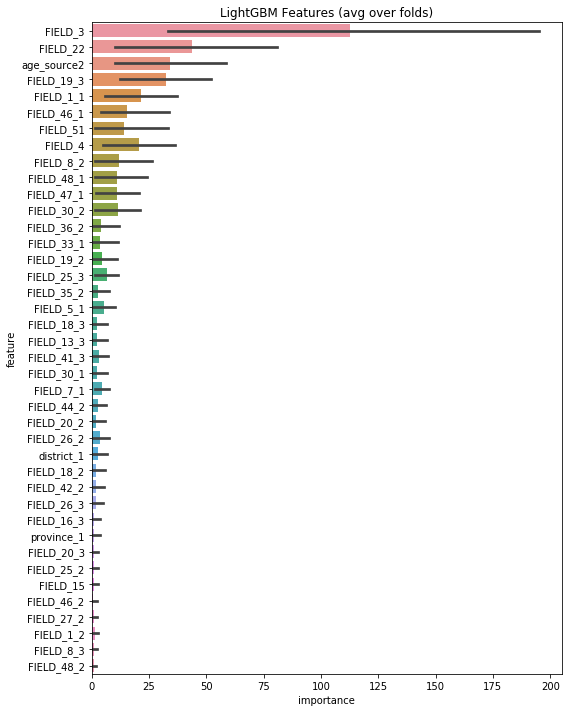

In [309]:
feature_importance_df = kfold_lightgbm(concat_df, num_folds= 5,submission_file_name = "data/sample_submission.csv", stratified = True)

In [305]:
concat_df = concat_df.drop(columns=['FIELD_11'])

In [307]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')